# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 
## APCOMP 209a Final Project

**Harvard University**<br/>
**Fall 2023**<br/>
**Instructors**: Pavlos Protopapas and Kevin Rader<br/>
**Group Members**: Davide Bray, Regina Lin, Shang Wang, Susannah Su

<hr style="height:2.4pt">

In [44]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

### Import Libraries

In [45]:
import pandas as pd
import re
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils import resample
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Disable scientific notation
pd.set_option('display.float_format', lambda x: '%.4f' % x)

<a id="contents"></a>

## Notebook contents

- [**Data description**](#data_description)
- [**Problem Statement**](#problem_statement)
- [**Project Organization**](#project_organization)

- [**Question 2: Interpretable modeling [18 pts]**](#part2)

- [**Question 3: Harvard and Yale? [30 pts]**](#part3)

- [**Question 4: Building predictive models for admitted [24 pts]**](#part4)

- [**Question 5: Evaluating results [12 pts]**](#part5)

<a id="data_description"></a>

## Data description
[Return to contents](#contents)

 (From Kaggle, see https://www.kaggle.com/datasets/cnic92/200-financial-indicators-of-us-stocks-20142018?select=2018_Financial_Data.csv)

 There are in total 5 datasets: `2014_Financial_Data.csv`, `2015_Financial_Data.csv`, `2016_Financial_Data.csv`, `2017_Financial_Data.csv`, `2018_Financial_Data.csv`.

Each dataset contains 200+ financial indicators, that are commonly found in the 10-K filings each publicly traded company releases yearly, for a plethora of US stocks (on average, 4k stocks are listed in each dataset). 

The dataset was built by the author leveraging Financial Modeling Prep API and pandas_datareader.

#### Important remarks regarding the datasets
1. Some financial indicator values are missing (`nan` cells), so the user can select the best technique to clean each dataset (`dropna`, `fillna`, etc.).
2. There are outliers, meaning extreme values that are probably caused by mistypings. Also in this case, the user can choose how to clean each dataset (have a look at the 1% - 99% percentile values).
3. The third-to-last column, `Sector`, lists the sector of each stock. Indeed, in the US stock market each company is part of a sector that classifies it in a macro-area. Since all the sectors have been collected (Basic Materials, Communication Services, Consumer Cyclical, Consumer Defensive, Energy, Financial Services, Healthcare, Industrial, Real Estate, Technology and Utilities), the user has the option to perform per-sector analyses and comparisons.
4. The second-to-last column, `PRICE VAR [%]`, lists the percent price variation of each stock for the year. For example, if we consider the dataset `2015_Financial_Data.csv`, we will have:
    - 200+ financial indicators for the year 2015;
    - percent price variation for the year 2016 (meaning from the first trading day on Jan 2016 to the last trading day on Dec 2016).

5. The last column, `class`, lists a binary classification for each stock, where
    - for each stock, if the `PRICE VAR [%]` value is positive, `class = 1`. From a trading perspective, the `1` identifies those stocks that an hypothetical trader should **BUY** at the start of the year and sell at the end of the year for a profit.
    - for each stock, if the `PRICE VAR [%]` value is negative, `class = 0`. From a trading perspective, the `0` identifies those stocks that an hypothetical trader should **NOT BUY**, since their value will decrease, meaning a loss of capital.

The columns `PRICE VAR [%]` and `class` make possible to use the datasets for both classification and regression tasks:
- If the we wish to train a machine learning model so that it learns to classify those stocks that in buy-worthy and not buy-worthy, it is possible to get the targets from the class column;
- If the we wish to train a machine learning model so that it learns to predict the future value of a stock, it is possible to get the targets from the `PRICE VAR [%]` column.

<a id="problem_statement"></a>

## Problem Statement

[Return to contents](#contents)

This project seeks to develop a machine learning model that predicts stock price variations using a range of financial indicators, without relying on individual stock identifiers (tickers). The aim is to uncover general patterns in the stock market that transcend company-specific characteristics, thereby creating a broadly applicable predictive tool. The challenge involves accurately capturing the complex dynamics of the market using available financial data, and ensuring that the model is robust and generalizable across various stocks and market conditions.

The project will begin with a simple baseline model, then advance to more sophisticated algorithms to improve prediction accuracy. Success will be measured by the model's ability to reliably predict stock price changes, providing a valuable asset for investors and analysts in making informed financial decisions. This endeavor is poised to enhance understanding and forecasting of market behaviors using machine learning techniques.

<a id="project_organization"></a>

## Project Organization

[Return to contents](#contents)

### Part 0: Data Preprocessing & Feature Selection / Exploratory Data Analysis

#### Overview
This foundational part focuses on preparing the dataset for various analyses and model building in the subsequent parts. The processes conducted here are crucial for ensuring the quality and effectiveness of the models and analyses.

#### Methodology
1. **Basic Processing**
* Load the dataset and rename the columns for clarity.
* Separate predictors and target variables (`price_var20xx`, `class20xx`, `xx` correspond to the year).
* Preselection of predictors based on industry knowledge and relevance.
* Train-test splitting first to prevent data leakage.
* Scaling of features to normalize data.

2. **EDA**
* Statistical summary of datasets to understand distributions and central tendencies.
* Visualization of data distributions and relationships (e.g., histograms, scatter plots).
* Correlation analysis to identify highly correlated features.
* Identification of trends and patterns specific to sectors.

3. **Handle Missingness**
* Examine nullness.
* K-NN imputation to handle missing values without making assumptions about the underlying distribution of the variables.

4. **Dimentionality Reduction**
* Apply principle component analysis (PCA) to reduce dimentionality.

### Part 1: Baseline Model Selection and Evaluation

#### Objective 
To establish a simple yet effective baseline model for predicting stock performance.

#### Methodology
1. **Model Selection and Building**
* Start with a simple mean/median model as a baseline.
    - Mean/median prediction model
    - Multiple linear regression
    - Single decision tree
* Train the model on our dataset and perform an initial evaluation using $MSE$.

2. **Cross Validations**
* Implement basic cross-validation (like k-fold CV) to assess the model’s performance more reliably.

3. **Interim Interpretation**
* Provide an initial interpretation of the model's performance, focusing on its strengths and limitations based on the evaluation metrics.
* Select the baseline model.

### Part 2: More Complex Models

#### Objective 
The objective of this stage is to explore and evaluate more sophisticated machine learning models beyond the baseline model. These models are expected to capture complex patterns and relationships in the data that the baseline model might miss. The goal is to improve prediction accuracy and reliability in forecasting stock performance, while also gaining deeper insights into how different financial indicators influence stock prices.

#### Methodology
1. **Selection of More Complex Models and Building**
* Identify a set of more complex models:
    - Ridge regression
    - LASSO regression
    - Elastic net regression
    - Random forest regressors
    - Gradient boosting
* Train the model on our dataset and perform an initial evaluation using $MSE$.

2. **Cross Validations**
* Implement basic cross-validation (like k-fold CV) to assess the model’s performance more reliably.
* Include a basic hyperparameter tuning to find a reasonably good configuration for each model, while avoiding extensive optimization at this stage.

3. **Performance Evaluation and Final Model Selection**
* Evaluate the tuned models using $MSE$.
* Compare the complex models with the baseline model.
* Select the final model.

### Part 3: Network Analysis of Stock Market Interdependencies

#### Objective
Analyze the network of interdependencies among stocks or sectors.

#### Methodology
1. **Network Construction**
* Construct a network graph based on the relationships derived from the preprocessed data.

2. **Network Analysis**
* Centrality measures to identify influential stocks.
* Community detection to find clusters of interrelated stocks.
* Dynamic analysis over different years to observe changes.

3. **Evaluation**
* Evaluate the network’s insights on stock market dynamics.

<a id="project_organization"></a>

## Part 0: Data Preprocessing & Feature Selection / Exploratory Data Analysis

[Return to contents](#contents)

### Basic Processing

In [46]:
# Load raw data
df2014 = pd.read_csv('data/2014_Financial_Data.csv')
df2015 = pd.read_csv('data/2015_Financial_Data.csv')
df2016 = pd.read_csv('data/2016_Financial_Data.csv')
df2017 = pd.read_csv('data/2017_Financial_Data.csv')
df2018 = pd.read_csv('data/2018_Financial_Data.csv')

In [47]:
# Inspect how does it look like -- 
# The "Unnamed: 0" column is probably stock ticker
df2014.head()

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,Tax assets,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Deferred revenue,Tax Liabilities,Deposit Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,ebtperEBIT,niperEBT,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,nIperEBT,eBTperEBIT,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,shortTermCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,dividendPayoutRatio,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,R&D to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per S

In [48]:
# Check that the df of different years all have same columns
# They do -- they all have 225 coloumns
print(df2014.columns, '\n')
print(df2015.columns, '\n')
print(df2016.columns, '\n')
print(df2017.columns, '\n')
print(df2018.columns, '\n')

Index(['Unnamed: 0', 'Revenue', 'Revenue Growth', 'Cost of Revenue',
       'Gross Profit', 'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense',
       ...
       'Receivables growth', 'Inventory Growth', 'Asset Growth',
       'Book Value per Share Growth', 'Debt Growth', 'R&D Expense Growth',
       'SG&A Expenses Growth', 'Sector', '2015 PRICE VAR [%]', 'Class'],
      dtype='object', length=225) 

Index(['Unnamed: 0', 'Revenue', 'Revenue Growth', 'Cost of Revenue',
       'Gross Profit', 'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense',
       ...
       'Receivables growth', 'Inventory Growth', 'Asset Growth',
       'Book Value per Share Growth', 'Debt Growth', 'R&D Expense Growth',
       'SG&A Expenses Growth', 'Sector', '2016 PRICE VAR [%]', 'Class'],
      dtype='object', length=225) 

Index(['Unnamed: 0', 'Revenue', 'Revenue Growth', 'Cost of Revenue',
       'Gross Profit', 'R

In [49]:
# Function to convert camel case to snake case and handle pre-existing underscores
def camel_to_snake(name):
    # Insert an underscore between lowercase followed by uppercase
    s1 = re.sub('([a-z])([A-Z])', r'\1_\2', name)
    # Handle pre-existing underscores (avoid double underscores)
    s2 = re.sub('_+', '_', s1)
    return s2.lower()

In [50]:
# Then convert any camelCase to snake_case
df2014.columns = [camel_to_snake(col) for col in df2014.columns]
df2015.columns = [camel_to_snake(col) for col in df2015.columns]
df2016.columns = [camel_to_snake(col) for col in df2016.columns]
df2017.columns = [camel_to_snake(col) for col in df2017.columns]
df2018.columns = [camel_to_snake(col) for col in df2018.columns]

In [51]:
# Renaming columns to follow industry practice
df2014.columns = [col.replace(' ', '_').lower() for col in df2014.columns]
df2015.columns = [col.replace(' ', '_').lower() for col in df2015.columns]
df2016.columns = [col.replace(' ', '_').lower() for col in df2016.columns]
df2017.columns = [col.replace(' ', '_').lower() for col in df2017.columns]
df2018.columns = [col.replace(' ', '_').lower() for col in df2018.columns]

In [52]:
# Rename the first column as 'ticker'
df2014.rename(columns={'unnamed:_0': 'ticker'}, inplace=True)
df2015.rename(columns={'unnamed:_0': 'ticker'}, inplace=True)
df2016.rename(columns={'unnamed:_0': 'ticker'}, inplace=True)
df2017.rename(columns={'unnamed:_0': 'ticker'}, inplace=True)
df2018.rename(columns={'unnamed:_0': 'ticker'}, inplace=True)

In [53]:
# Rename successfully
df2014.head()

,ticker,revenue,revenue_growth,cost_of_revenue,gross_profit,r&d_expenses,sg&a_expense,operating_expenses,operating_income,interest_expense,earnings_before_tax,income_tax_expense,net_income_-_non-controlling_int,net_income_-_discontinued_ops,net_income,preferred_dividends,net_income_com,eps,eps_diluted,weighted_average_shs_out,weighted_average_shs_out_(dil),dividend_per_share,gross_margin,ebitda_margin,ebit_margin,profit_margin,free_cash_flow_margin,ebitda,ebit,consolidated_income,earnings_before_tax_margin,net_profit_margin,cash_and_cash_equivalents,short-term_investments,cash_and_short-term_investments,receivables,inventories,total_current_assets,"property,_plant_&_equipment_net",goodwill_and_intangible_assets,long-term_investments,tax_assets,total_non-current_assets,total_assets,payables,short-term_debt,total_current_liabilities,long-term_debt,total_debt,deferred_revenue,tax_liabilities,deposit_liabilities,total_non-current_liabilities,total_liabilities,other_comprehensive_income,retained_earnings_(deficit),total_shareholders_equity,investments,net_debt,other_assets,other_liabilities,depreciation_&_amortization,stock-based_compensation,operating_cash_flow,capital_expenditure,acquisitions_and_disposals,investment_purchases_and_sales,investing_cash_flow,issuance_(repayment)_of_debt,issuance_(buybacks)_of_shares,dividend_payments,financing_cash_flow,effect_of_forex_changes_on_cash,net_cash_flow_/_change_in_cash,free_cash_flow,net_cash/marketcap,price_book_value_ratio,price_to_book_ratio,price_to_sales_ratio,price_earnings_ratio,price_to_free_cash_flows_ratio,price_to_operating_cash_flows_ratio,price_cash_flow_ratio,price_earnings_to_growth_ratio,price_sales_ratio,dividend_yield,enterprise_value_multiple,price_fair_value,ebitper_revenue,ebtper_ebit,niper_ebt,gross_profit_margin,operating_profit_margin,pretax_profit_margin,net_profit_margin,effective_tax_rate,return_on_assets,return_on_equity,return_on_capital_employed,n_iper_ebt,e_btper_ebit,e_bitper_revenue,payables_turnover,inventory_turnover,fixed_asset_turnover,asset_turnover,current_ratio,quick_ratio,cash_ratio,days_of_sales_outstanding,days_of_inventory_outstanding,operating_cycle,days_of_payables_outstanding,cash_conversion_cycle,debt_ratio,debt_equity_ratio,longterm_debt_to_capitalization,total_debt_to_capitalization,interest_coverage,cash_flow_to_debt_ratio,company_equity_multiplier,operating_cash_flow_per_share,free_cash_flow_per_share,cash_per_share,payout_ratio,operating_cash_flow_sales_ratio,free_cash_flow_operating_cash_flow_ratio,cash_flow_coverage_ratios,short_term_coverage_ratios,capital_expenditure_coverage_ratios,dividendpaid_and_capex_coverage_ratios,dividend_payout_ratio,revenue_per_share,net_income_per_share,operating_cash_flow_per_share,free_cash_flow_per_share,cash_per_share,book_value_per_share,tangible_book_value_per_share,shareholders_equity_per_share,interest_debt_per_share,market_cap,enterprise_value,pe_ratio,price_to_sales_ratio,pocf_ratio,pfcf_ratio,pb_ratio,ptb_ratio,ev_to_sales,enterprise_value_over_ebitda,ev_to_operating_cash_flow,ev_to_free_cash_flow,earnings_yield,free_cash_flow_yield,debt_to_equity,debt_to_assets,net_debt_to_ebitda,current_ratio,interest_coverage,income_quality,dividend_yield,payout_ratio,sg&a_to_revenue,r&d_to_revenue,intangibles_to_total_assets,capex_to_operating_cash_flow,capex_to_revenue,capex_to_depreciation,stock-based_compensation_to_revenue,graham_number,roic,return_on_tangible_assets,graham_net-net,working_capital,tangible_asset_value,net_current_asset_value,invested_capital,average_receivables,average_payables,average_inventory,days_sales_outstanding,days_payables_outstanding,days_of_inventory_on_hand,receivables_turnover,payables_turnover,inventory_turnover,roe,capex_per_share,gross_profit_growth,ebit_growth,operating_income_growth,net_income_growth,eps_growth,eps_diluted_growth,weighted_average_shares_growth,weighted_average_shares_diluted_growth,dividends_per_share_growth,operating_cash_flow_growth,free_cash_flow

### Examine Nullness (Preliminary)

From below we see that our data set does have quite a few missing values. We will handle the missingness using imputation methods later.

In [54]:
df2014.isnull().sum()

ticker                                           0
revenue                                         44
revenue_growth                                 236
cost_of_revenue                                 74
gross_profit                                    52
r&d_expenses                                   136
sg&a_expense                                    59
operating_expenses                              63
operating_income                                55
interest_expense                                63
earnings_before_tax                             80
income_tax_expense                              66
net_income_-_non-controlling_int               149
net_income_-_discontinued_ops                  149
net_income                                      23
preferred_dividends                            149
net_income_com                                  15
eps                                             72
eps_diluted                                     84
weighted_average_shs_out       

In [55]:
df2015.isnull().sum()

ticker                                           0
revenue                                         67
revenue_growth                                 340
cost_of_revenue                                193
gross_profit                                    65
r&d_expenses                                   265
sg&a_expense                                   170
operating_expenses                             174
operating_income                                42
interest_expense                               175
earnings_before_tax                            103
income_tax_expense                             151
net_income_-_non-controlling_int               287
net_income_-_discontinued_ops                  287
net_income                                     165
preferred_dividends                            287
net_income_com                                 119
eps                                             96
eps_diluted                                     90
weighted_average_shs_out       

In [56]:
df2016.isnull().sum()

ticker                                           0
revenue                                        489
revenue_growth                                 649
cost_of_revenue                                640
gross_profit                                   492
r&d_expenses                                   713
sg&a_expense                                   613
operating_expenses                             620
operating_income                               465
interest_expense                               620
earnings_before_tax                            531
income_tax_expense                             596
net_income_-_non-controlling_int               738
net_income_-_discontinued_ops                  738
net_income                                     606
preferred_dividends                            738
net_income_com                                 558
eps                                            522
eps_diluted                                    515
weighted_average_shs_out       

In [57]:
df2017.isnull().sum()

ticker                                           0
revenue                                        525
revenue_growth                                 724
cost_of_revenue                                679
gross_profit                                   534
r&d_expenses                                   787
sg&a_expense                                   661
operating_expenses                             661
operating_income                               504
interest_expense                               677
earnings_before_tax                            579
income_tax_expense                             635
net_income_-_non-controlling_int               835
net_income_-_discontinued_ops                  835
net_income                                     620
preferred_dividends                            835
net_income_com                                 582
eps                                            546
eps_diluted                                    540
weighted_average_shs_out       

In [58]:
df2018.isnull().sum()

ticker                                           0
revenue                                         46
revenue_growth                                 139
cost_of_revenue                                185
gross_profit                                    64
r&d_expenses                                   237
sg&a_expense                                   166
operating_expenses                             184
operating_income                                35
interest_expense                               184
earnings_before_tax                             71
income_tax_expense                             140
net_income_-_non-controlling_int               250
net_income_-_discontinued_ops                  250
net_income                                     151
preferred_dividends                            250
net_income_com                                 117
eps                                             65
eps_diluted                                     63
weighted_average_shs_out       

### Exploration of Predictors and Targets / Pre-Selection of Predictors

From investopidia: https://www.investopedia.com/articles/basics/04/100804.asp

Stock prices are ultimately determined by supply and demand, which are influenced by both fundamental and technical factors.

#### Fundamental factors

Fundamental factors relate to a company's financial performance, especially earnings. The earnings per share (EPS) represents the owner's proportional share of earnings. The P/E ratio expresses the valuation multiple, i.e. how much an investor is willing to pay for those future earnings. Earnings can also be measured by cash flow per share or dividends per share. The valuation multiple depends on the expected earnings growth rate and the discount rate, which represents inflation and the perceived riskiness of the stock. Higher expected growth leads to a higher multiple, while higher risk or inflation leads to a lower multiple.

#### Technical factors

Technical factors are from external market conditions that drive supply and demand. Historically, low inflation boosts multiples while high inflation lowers them. Deflation hurts pricing power. Stocks tend to move with the overall market and their industry peers, and stocks compete with other asset classes like bonds and commodities. Regarding investors, middle-aged investors tend to invest more in stocks. Furthermore, stocks build momentum or revert to the mean. Large cap stocks have high liquidity while small caps often have a liquidity discount. Finally, unforeseen positive or negative events impact sentiment, and psychology often weighs more heavily than fundamentals in the short term. Behavioral finance aims to explain irrational market behavior.

#### Reconciliation

While technicals often dominate in the short run, fundamentals determine long-term prices. Different investors weigh the factors differently, but both play a critical role in the complicated dynamics of supply, demand, and human psychology. We decide to have the following categories of predictors and cross-check and see if our datasets include them:

**Fundamentals**
* Earnings Per Share (EPS) and Diluted EPS: Directly related to earnings power
* Revenue, Net Income, Gross Profit, Operating Income, Earnings Before Tax: Critical components of earnings base
* Revenue Growth, EPS Growth, Net Income Growth: Reflect expected earnings growth
* P/E Ratio, P/S Ratio, P/B Ratio, Dividend Yield: Valuation multiples based on earnings
* Dividends Per Share: Important for mature dividend-paying companies

**Technical Factors**
* Market Capitalization: Relates to liquidity and size
* Trading Volume: Reflects liquidity and investor interest
* Total Debt, Long Term Debt, Debt-to-Equity, Net Debt to EBITDA: Influence risk profile and cost of capital
* Operating Cash Flow, Free Cash Flow, Capital Expenditures, Cash & Cash Equivalents: Reflect ability to generate cash

**Market Sentiment**
* EV/EBITDA, EV/Sales, Earnings Yield, FCF Yield: May capture some market sentiment
* General Financial Health: Current Ratio, Quick Ratio: Assess short-term liquidity
* Net Profit Margin, ROA, ROE: Show how efficiently company is run
* Asset Turnover, Inventory Turnover, Receivables Turnover: Reflect asset utilization
* Total Assets, Total Liabilities, Total Debt, Net Debt: consolidated metrics

**Sector Information**
* Sector: Captures industry-specific effects

By carefully selecting the most relevant predictors based on the Investopedia framework, we have reduced the number of features in our dataset **from 223 down to 46**. This significant reduction will allow us to focus on the core factors driving stock prices (as well as whether or not a stock is buy-worthy).

#### Separate Predictors and Targets

In [59]:
predictors2014 = df2014.drop(columns=['class', '2015_price_var_[%]'])
class2014 = df2014[['class']]
price_var2014=df2014[['2015_price_var_[%]']]

In [60]:
predictors2014.head()

,ticker,revenue,revenue_growth,cost_of_revenue,gross_profit,r&d_expenses,sg&a_expense,operating_expenses,operating_income,interest_expense,earnings_before_tax,income_tax_expense,net_income_-_non-controlling_int,net_income_-_discontinued_ops,net_income,preferred_dividends,net_income_com,eps,eps_diluted,weighted_average_shs_out,weighted_average_shs_out_(dil),dividend_per_share,gross_margin,ebitda_margin,ebit_margin,profit_margin,free_cash_flow_margin,ebitda,ebit,consolidated_income,earnings_before_tax_margin,net_profit_margin,cash_and_cash_equivalents,short-term_investments,cash_and_short-term_investments,receivables,inventories,total_current_assets,"property,_plant_&_equipment_net",goodwill_and_intangible_assets,long-term_investments,tax_assets,total_non-current_assets,total_assets,payables,short-term_debt,total_current_liabilities,long-term_debt,total_debt,deferred_revenue,tax_liabilities,deposit_liabilities,total_non-current_liabilities,total_liabilities,other_comprehensive_income,retained_earnings_(deficit),total_shareholders_equity,investments,net_debt,other_assets,other_liabilities,depreciation_&_amortization,stock-based_compensation,operating_cash_flow,capital_expenditure,acquisitions_and_disposals,investment_purchases_and_sales,investing_cash_flow,issuance_(repayment)_of_debt,issuance_(buybacks)_of_shares,dividend_payments,financing_cash_flow,effect_of_forex_changes_on_cash,net_cash_flow_/_change_in_cash,free_cash_flow,net_cash/marketcap,price_book_value_ratio,price_to_book_ratio,price_to_sales_ratio,price_earnings_ratio,price_to_free_cash_flows_ratio,price_to_operating_cash_flows_ratio,price_cash_flow_ratio,price_earnings_to_growth_ratio,price_sales_ratio,dividend_yield,enterprise_value_multiple,price_fair_value,ebitper_revenue,ebtper_ebit,niper_ebt,gross_profit_margin,operating_profit_margin,pretax_profit_margin,net_profit_margin,effective_tax_rate,return_on_assets,return_on_equity,return_on_capital_employed,n_iper_ebt,e_btper_ebit,e_bitper_revenue,payables_turnover,inventory_turnover,fixed_asset_turnover,asset_turnover,current_ratio,quick_ratio,cash_ratio,days_of_sales_outstanding,days_of_inventory_outstanding,operating_cycle,days_of_payables_outstanding,cash_conversion_cycle,debt_ratio,debt_equity_ratio,longterm_debt_to_capitalization,total_debt_to_capitalization,interest_coverage,cash_flow_to_debt_ratio,company_equity_multiplier,operating_cash_flow_per_share,free_cash_flow_per_share,cash_per_share,payout_ratio,operating_cash_flow_sales_ratio,free_cash_flow_operating_cash_flow_ratio,cash_flow_coverage_ratios,short_term_coverage_ratios,capital_expenditure_coverage_ratios,dividendpaid_and_capex_coverage_ratios,dividend_payout_ratio,revenue_per_share,net_income_per_share,operating_cash_flow_per_share,free_cash_flow_per_share,cash_per_share,book_value_per_share,tangible_book_value_per_share,shareholders_equity_per_share,interest_debt_per_share,market_cap,enterprise_value,pe_ratio,price_to_sales_ratio,pocf_ratio,pfcf_ratio,pb_ratio,ptb_ratio,ev_to_sales,enterprise_value_over_ebitda,ev_to_operating_cash_flow,ev_to_free_cash_flow,earnings_yield,free_cash_flow_yield,debt_to_equity,debt_to_assets,net_debt_to_ebitda,current_ratio,interest_coverage,income_quality,dividend_yield,payout_ratio,sg&a_to_revenue,r&d_to_revenue,intangibles_to_total_assets,capex_to_operating_cash_flow,capex_to_revenue,capex_to_depreciation,stock-based_compensation_to_revenue,graham_number,roic,return_on_tangible_assets,graham_net-net,working_capital,tangible_asset_value,net_current_asset_value,invested_capital,average_receivables,average_payables,average_inventory,days_sales_outstanding,days_payables_outstanding,days_of_inventory_on_hand,receivables_turnover,payables_turnover,inventory_turnover,roe,capex_per_share,gross_profit_growth,ebit_growth,operating_income_growth,net_income_growth,eps_growth,eps_diluted_growth,weighted_average_shares_growth,weighted_average_shares_diluted_growth,dividends_per_share_growth,operating_cash_flow_growth,free_cash_flow

In [61]:
class2014.head()

,class
0,0
1,0
2,1
3,1
4,1


In [62]:
price_var2014.head()

,2015_price_var_[%]
0,-9.3233
1,-25.5122
2,33.1183
3,2.7523
4,12.8977


In [63]:
predictors2015 = df2015.drop(columns=['class', '2016_price_var_[%]'])
class2015 = df2015[['class']]
price_var2015 = df2015[['2016_price_var_[%]']]

In [64]:
predictors2016 = df2016.drop(columns=['class', '2017_price_var_[%]'])
class2016 = df2016[['class']]
price_var2016 = df2016[['2017_price_var_[%]']]

In [65]:
predictors2017 = df2017.drop(columns=['class', '2018_price_var_[%]'])
class2017 = df2017[['class']]
price_var2017 = df2017[['2018_price_var_[%]']]

In [66]:
predictors2018 = df2018.drop(columns=['class', '2019_price_var_[%]'])
class2018 = df2018[['class']]
price_var2018 = df2018[['2019_price_var_[%]']]

In [67]:
pd.set_option('display.max_seq_items', None)
print(predictors2014.columns)

Index(['ticker', 'revenue', 'revenue_growth', 'cost_of_revenue',
       'gross_profit', 'r&d_expenses', 'sg&a_expense', 'operating_expenses',
       'operating_income', 'interest_expense', 'earnings_before_tax',
       'income_tax_expense', 'net_income_-_non-controlling_int',
       'net_income_-_discontinued_ops', 'net_income', 'preferred_dividends',
       'net_income_com', 'eps', 'eps_diluted', 'weighted_average_shs_out',
       'weighted_average_shs_out_(dil)', 'dividend_per_share', 'gross_margin',
       'ebitda_margin', 'ebit_margin', 'profit_margin',
       'free_cash_flow_margin', 'ebitda', 'ebit', 'consolidated_income',
       'earnings_before_tax_margin', 'net_profit_margin',
       'cash_and_cash_equivalents', 'short-term_investments',
       'cash_and_short-term_investments', 'receivables', 'inventories',
       'total_current_assets', 'property,_plant_&_equipment_net',
       'goodwill_and_intangible_assets', 'long-term_investments', 'tax_assets',
       'total_non-current

In [68]:
# Reset option to avoid potential performance issues in other parts
pd.reset_option('display.max_seq_items')

#### Initial Filtering of Predictors

Based on Investopedia, we decide to keep the following predictors --

##### Fundamental Factors

1. EPS (`eps`, `eps_diluted`): Include as it directly relates to earnings power.
2. Revenue and Profitability (`revenue`, `net_income`, `gross_profit`, `operating_income`, `earnings_before_tax`): These are critical components of the earnings base.
3. Growth Metrics (`revenue_growth`, `eps_growth`, `net_income_growth`): These are reflective of the expected growth in earnings.
4. Valuation Metrics (`pe_ratio`, `price_to_sales_ratio`, `pb_ratio`, `dividend_yield`): They are essential for understanding how the market values the earnings and assets of a company.
5. Dividends (`dividend_per_share`, `dividends_per_share_growth`): Important for mature companies where dividends are a significant factor.

##### Technical Factors

1. Market Cap (`market_cap`): Relates to liquidity and the size of the company.
2. Trading Volume (not explicitly listed, but can be derived or included as a data point): Reflects liquidity and investor interest.
3. Debt and Capital Structure (`total_debt`, `long-term_debt`, `debt_to_equity`, `net_debt_to_ebitda`): These can influence a company's risk profile and cost of capital.
4. Investment and Cash Flow (`operating_cash_flow`, `free_cash_flow`, `capital_expenditure`, `cash_and_cash_equivalents`): Reflects the company’s ability to generate cash and fund operations.

##### Market Sentiment

1. Price Volatility and Ratios (`enterprise_value_over_ebitda`, `ev_to_sales`, `earnings_yield`, `free_cash_flow_yield`): These might capture some elements of market sentiment.
2. Investor Sentiment Indicators (not listed, but could include news sentiment analysis or social media sentiment data): These would represent the behavioral aspect of the market.

##### General Financial Health Indicators

1. Liquidity Ratios (`current_ratio`, `quick_ratio`): To assess the company's ability to meet short-term obligations.
2. Profitability Ratios (`net_profit_margin`, `return_on_assets`, `return_on_equity`): Indicative of how efficiently a company is run.
3. Efficiency Ratios (`asset_turnover`, `inventory_turnover`, `receivables_turnover`): Reflective of how well the company utilizes its assets.

##### Remove Redundant or Highly Correlated Predictors

* Remove items that are variations of the same measure (e.g., `weighted_average_shs_out` and `weighted_average_shs_out_(dil)`; just keep one).
* Combine growth metrics into a single predictor if they are highly correlated (e.g., `5y_revenue_growth_(per_share)` and `3y_revenue_growth_(per_share)` might be combined).
Use consolidated metrics rather than broken-down values when they convey the same information (e.g., `total_assets`, `total_liabilities`, `total_debt`).

##### Sector Information

* Sector (`sector`): This categorical variable can capture industry-specific effects.

##### Filter Predictors

In [69]:
# Define lists of predictors for each category
# To keep our model simple, we selected a list of predictors to include based on industry knowledge.
# In the future, this selection process could be more systematic.

fundamental_factors = [
    'eps', 'revenue', 'net_income', 'gross_profit', 'dividend_per_share',
    'revenue_growth', 'eps_growth', 'net_income_growth',
    'pe_ratio', 'price_to_sales_ratio', 'pb_ratio', 'dividend_yield'
]

technical_factors = [
    'market_cap',
    'total_debt', 
    'operating_cash_flow', 'free_cash_flow', 'capital_expenditure',
    'cash_and_cash_equivalents'
]

gen_fin_health = [
    'total_assets', 'total_liabilities'
]

sector_info = [
    'sector'
]

# Combine all the lists into one
all_selected_columns = (
    fundamental_factors + technical_factors + gen_fin_health + sector_info
)

In [70]:
def pre_filter_predictor(df, columns):
    """
    Extract a subset of columns from a DataFrame safely, ensuring no duplicate columns in output.

    Only includes unique columns in the provided list if they exist in the DataFrame.
    Removes duplicate columns from the DataFrame itself.
    Returns a tuple with the subset DataFrame and a set of missing column names.

    Parameters:
    - df (pandas.DataFrame): The DataFrame to subset.
    - columns (list): Column names to include in the subset.

    Returns:
    - (pandas.DataFrame, set): A tuple with the subset DataFrame and a set of missing columns.
    """

    # Extract existing columns
    existing_columns = [col for col in columns if col in df.columns]
    
    # Create subset DataFrame and identify missing columns
    subset_df = df[existing_columns]

    # Ensure no duplicates in the output DataFrame
    subset_df = subset_df.loc[:, ~subset_df.columns.duplicated()]

    return subset_df, set(columns) - set(existing_columns)


In [71]:
predictors2014_selected, predictors2014_missing_col = pre_filter_predictor(predictors2014, all_selected_columns)

In [72]:
# Successful!
predictors2014_missing_col

set()

In [73]:
predictors2015_selected, predictors2015_missing_col = pre_filter_predictor(predictors2015, all_selected_columns)

In [74]:
predictors2015_selected.shape[1]

21

In [75]:
# Successful!
predictors2015_missing_col

set()

In [76]:
predictors2016_selected, predictors2016_missing_col = pre_filter_predictor(predictors2016, all_selected_columns)

In [77]:
predictors2016_selected.shape[1]

21

In [78]:
# Successful!
predictors2016_missing_col

set()

In [79]:
predictors2017_selected, predictors2017_missing_col = pre_filter_predictor(predictors2017, all_selected_columns)

In [80]:
predictors2017_selected.shape[1]

21

In [81]:
# Successful!
predictors2017_missing_col

set()

In [82]:
predictors2018_selected, predictors2018_missing_col = pre_filter_predictor(predictors2018, all_selected_columns)

In [83]:
predictors2018_selected.shape[1]

21

In [84]:
# Successful!
predictors2018_missing_col

set()

**So we have reduce the number of predictors in each dataset from 223 to 21! This still seems a bit too many so we will use PCA to help us further reduce the number of predictors.**

### Data Types

We see that basically all of the predictors, except `sector`, are of type `float`. We use `predictors2014` as an example to show this:

In [85]:
predictors2014_selected.dtypes

eps                          float64
revenue                      float64
net_income                   float64
gross_profit                 float64
dividend_per_share           float64
revenue_growth               float64
eps_growth                   float64
net_income_growth            float64
pe_ratio                     float64
price_to_sales_ratio         float64
pb_ratio                     float64
dividend_yield               float64
market_cap                   float64
total_debt                   float64
operating_cash_flow          float64
free_cash_flow               float64
capital_expenditure          float64
cash_and_cash_equivalents    float64
total_assets                 float64
total_liabilities            float64
sector                        object
dtype: object

Our two types of targets, `class20xx` and `price_var20xx` are both numerical.

In [86]:
class2014.dtypes

class    int64
dtype: object

In [87]:
price_var2014.dtypes

2015_price_var_[%]    float64
dtype: object

### Examine Nullness after Pre-Selection of Predictors

#### Check Percentage of Missing Data for Each Predictor and Target

* None of the target variables has missing values, which is good.
* Most predictors have a small percentage of missing values ($< 20\%$), with a few exceptions each year. We will drop the exceptions across all 4 datasets to ensure a uniform structure of our datasets (if the percentage of missingness is $> 21\%$).

**Note:** The value $21\%$ is a subjective choice after examining the overall missingness to ensure we can keep most of the predictors to avoid losing useful data. This will require more advance consideration in the type of missingness of the data, but with time constraint we will make the decision for now and this could be an area of enhancement for further development of the project.

In [88]:
# Check the percentage of missing data in each column
missing_2014 = predictors2014_selected.isnull().mean() * 100
print(missing_2014)

eps                          1.8908
revenue                      1.1555
net_income                   0.6040
gross_profit                 1.3655
dividend_per_share           3.9128
revenue_growth               6.1975
eps_growth                   7.4055
net_income_growth            6.3813
pe_ratio                     4.0441
price_to_sales_ratio         4.7532
pb_ratio                    16.9118
dividend_yield              18.0672
market_cap                   7.8256
total_debt                   2.0483
operating_cash_flow          1.0504
free_cash_flow               1.2342
capital_expenditure          1.3655
cash_and_cash_equivalents    1.5231
total_assets                 0.8666
total_liabilities            1.0242
sector                       0.0000
dtype: float64


In [89]:
# Print values that are greater than 21%
print(missing_2014[missing_2014 > 21])

Series([], dtype: float64)


In [90]:
class2014.isnull().sum()

class    0
dtype: int64

In [91]:
price_var2014.isnull().sum()

2015_price_var_[%]    0
dtype: int64

In [92]:
missing_2015 = predictors2015_selected.isnull().mean() * 100
print(missing_2015)

eps                          2.3301
revenue                      1.6262
net_income                   4.0049
gross_profit                 1.5777
dividend_per_share           6.9660
revenue_growth               8.2524
eps_growth                   9.3447
net_income_growth            8.4223
pe_ratio                     6.7718
price_to_sales_ratio         6.7961
pb_ratio                    19.3932
dividend_yield              12.1602
market_cap                  10.6553
total_debt                   4.5146
operating_cash_flow          1.5534
free_cash_flow               4.0777
capital_expenditure          3.2039
cash_and_cash_equivalents    1.5777
total_assets                 2.1359
total_liabilities            2.6456
sector                       0.0000
dtype: float64


In [93]:
# Print values that are greater than 21%
print(missing_2015[missing_2015 > 21])

Series([], dtype: float64)


In [94]:
class2015.isnull().sum()

class    0
dtype: int64

In [95]:
price_var2015.isnull().sum()

2016_price_var_[%]    0
dtype: int64

In [96]:
missing_2016 = predictors2016_selected.isnull().mean() * 100
print(missing_2016)

eps                         10.8818
revenue                     10.1939
net_income                  12.6329
gross_profit                10.2564
dividend_per_share          15.3846
revenue_growth              13.5293
eps_growth                  13.9879
net_income_growth           15.6765
pe_ratio                    15.2178
price_to_sales_ratio        15.2595
pb_ratio                    26.9960
dividend_yield              20.0959
market_cap                  18.7409
total_debt                  12.9873
operating_cash_flow         10.1313
free_cash_flow              12.7788
capital_expenditure         12.0075
cash_and_cash_equivalents   10.2773
total_assets                11.0069
total_liabilities           11.4863
sector                       0.0000
dtype: float64


In [97]:
# Print values that are greater than 21%
print(missing_2016[missing_2016 > 21])

pb_ratio   26.9960
dtype: float64


In [98]:
class2016.isnull().sum()

class    0
dtype: int64

In [99]:
price_var2016.isnull().sum()

2017_price_var_[%]    0
dtype: int64

In [100]:
missing_2017 = predictors2017_selected.isnull().mean() * 100
print(missing_2017)

eps                         11.0081
revenue                     10.5847
net_income                  12.5000
gross_profit                10.7661
dividend_per_share          16.8347
revenue_growth              14.5968
eps_growth                  14.3952
net_income_growth           16.3306
pe_ratio                    16.7944
price_to_sales_ratio        16.8347
pb_ratio                    28.4073
dividend_yield              17.8629
market_cap                  20.3024
total_debt                  13.1653
operating_cash_flow         10.4839
free_cash_flow              12.9839
capital_expenditure         12.4798
cash_and_cash_equivalents   10.3629
total_assets                11.0484
total_liabilities           11.4919
sector                       0.0000
dtype: float64


In [101]:
# Print values that are greater than 21%
print(missing_2017[missing_2017 > 21])

pb_ratio   28.4073
dtype: float64


In [102]:
class2017.isnull().sum()

class    0
dtype: int64

In [103]:
price_var2017.isnull().sum()

2018_price_var_[%]    0
dtype: int64

In [104]:
missing_2018 = predictors2018_selected.isnull().mean() * 100
print(missing_2018)

eps                          1.4800
revenue                      1.0474
net_income                   3.4381
gross_profit                 1.4572
dividend_per_share           5.6922
revenue_growth               3.1648
eps_growth                   2.9827
net_income_growth            5.2368
pe_ratio                     5.7377
price_to_sales_ratio         5.8060
pb_ratio                    18.8980
dividend_yield               5.8971
market_cap                   9.7450
total_debt                   3.8251
operating_cash_flow          1.3206
free_cash_flow               3.8024
capital_expenditure          3.2787
cash_and_cash_equivalents    1.1157
total_assets                 2.4590
total_liabilities            2.8916
sector                       0.0000
dtype: float64


In [105]:
# Print values that are greater than 21%
print(missing_2018[missing_2018 > 21])

Series([], dtype: float64)


In [106]:
class2018.isnull().sum()

class    0
dtype: int64

In [107]:
price_var2018.isnull().sum()

2019_price_var_[%]    0
dtype: int64

#### Visualization of Missingness

Here we use the `missingno` (missing "no") library to visualize the patterns of missing data.

**Interpretation Strategies:**
* Randomness: If the missingness appears random without a discernible pattern across the matrix plot, it may suggest that the data is Missing Completely At Random (MCAR).
* Patterns or Bands: Systematic patterns or bands in the matrix plot may suggest that the data is Missing At Random (MAR) where missingness is systematic and related to other observed variables.
* Blocks: If you see blocks of white in the matrix plot, this suggests that there might be groups of data that are Missing Not At Random (MNAR), indicating a potential inherent problem with the data collection process.
* Correlation in Heatmap: High correlation in the heatmap suggests that the missingness of one variable is not independent of another, which is common with MAR or MNAR.

<Axes: >

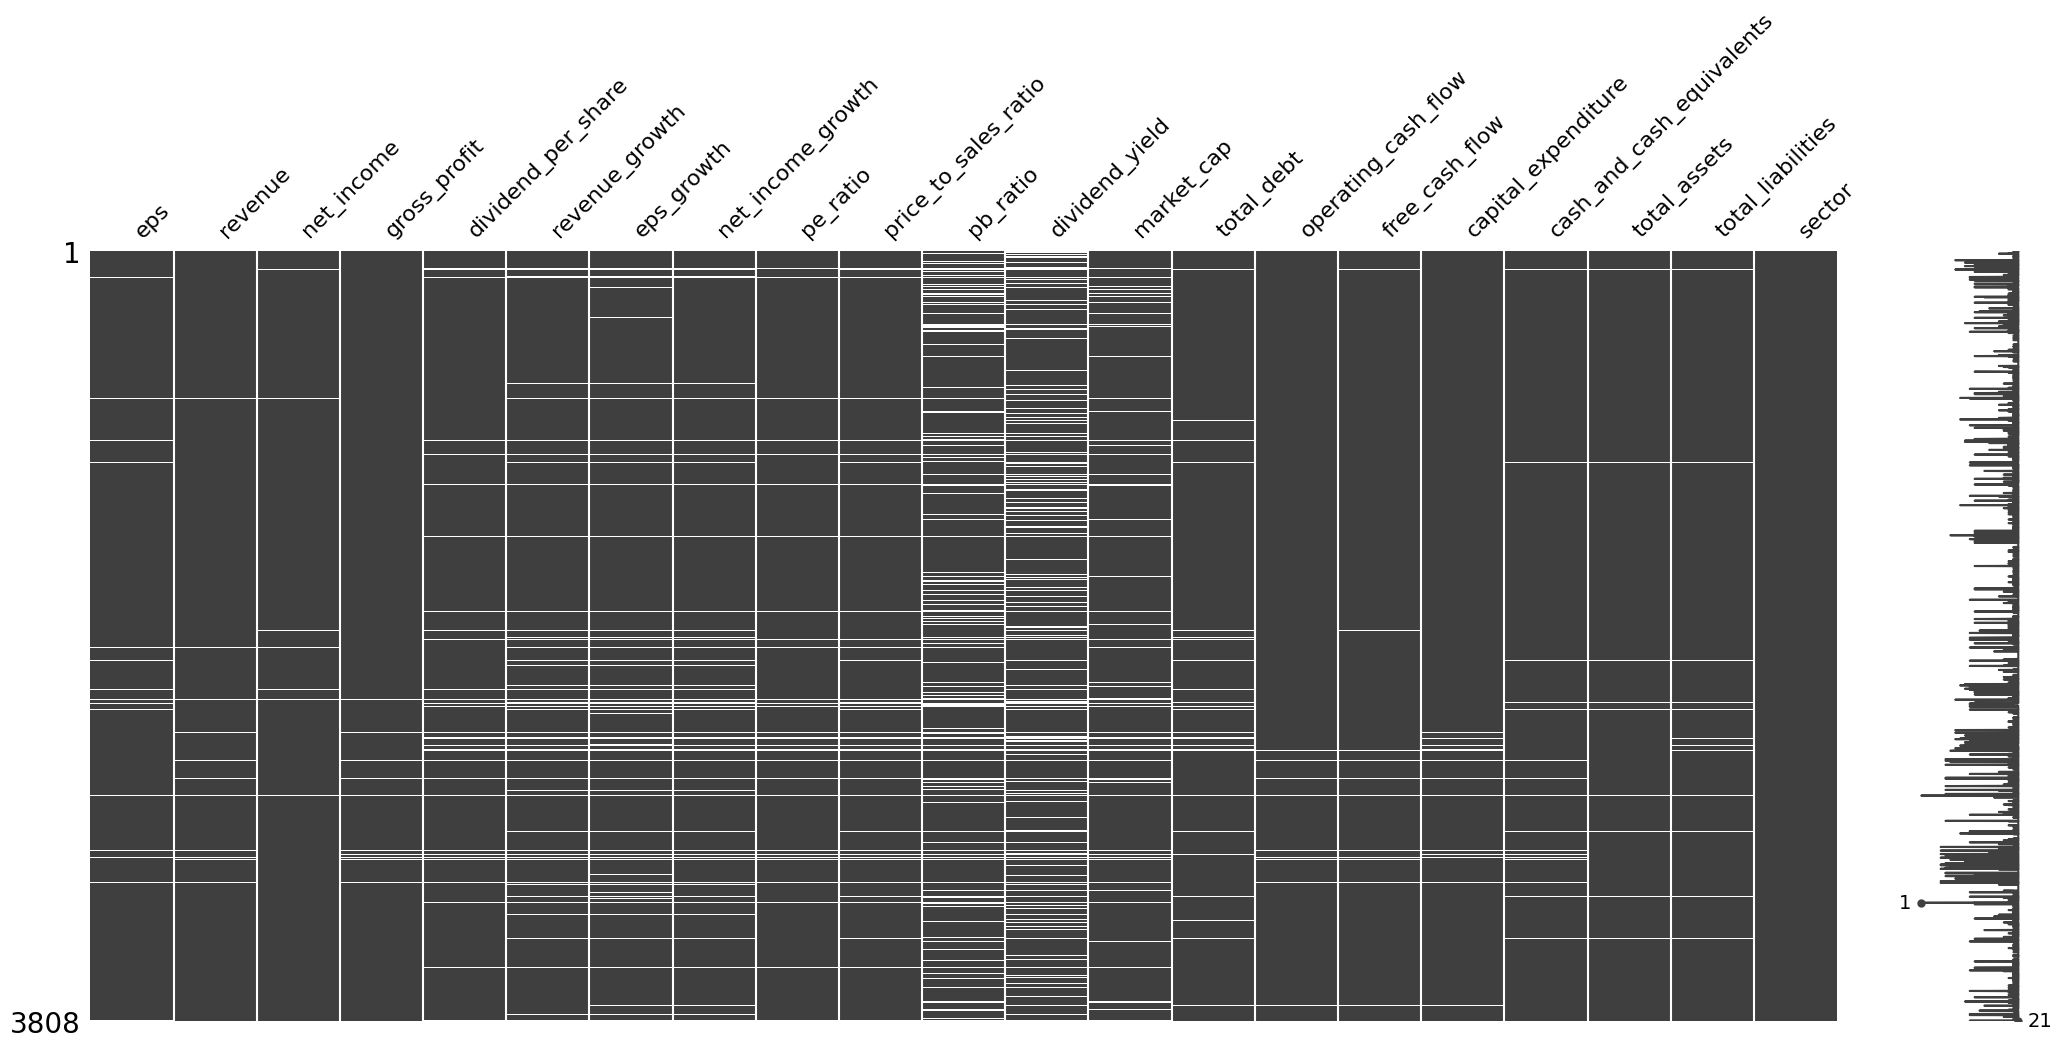

In [108]:
# Visualize the missingness pattern
msno.matrix(predictors2014_selected)

<Axes: >

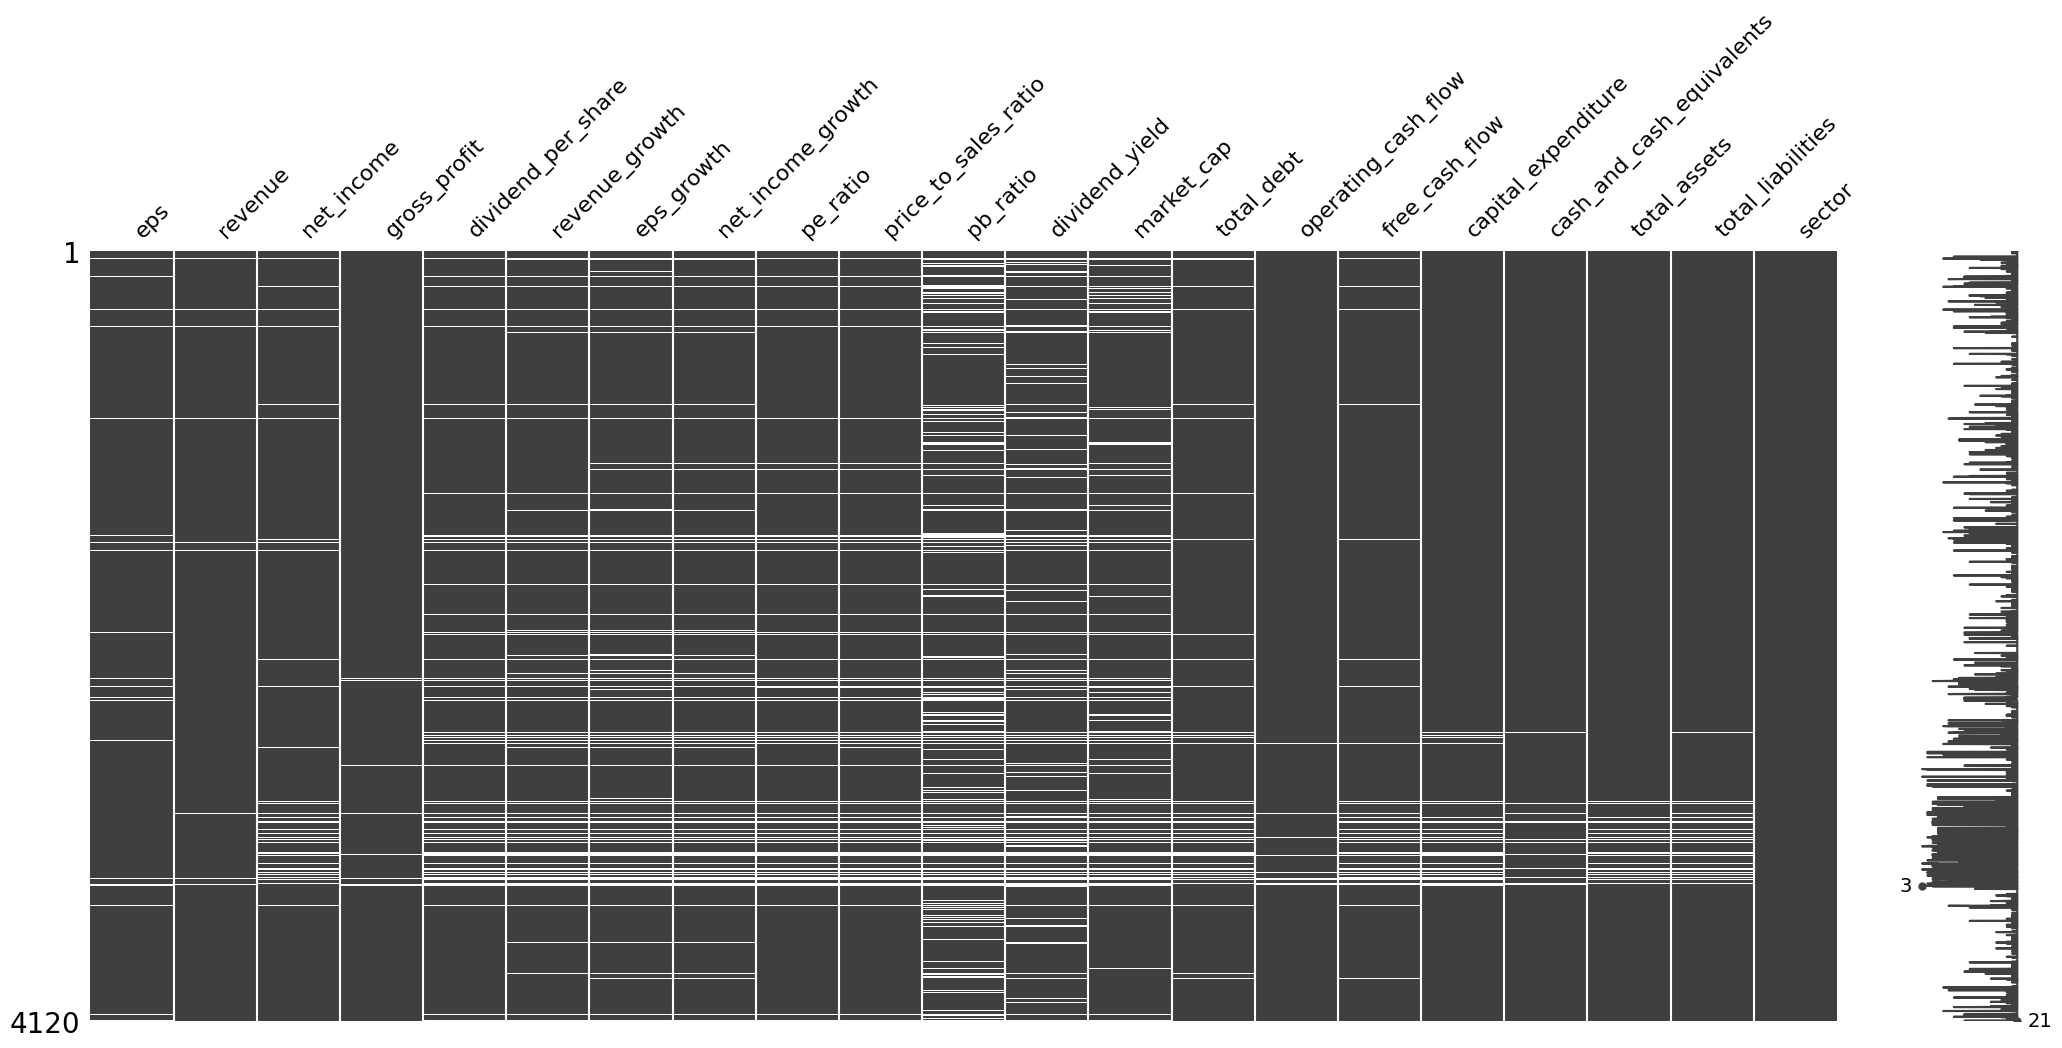

In [109]:
msno.matrix(predictors2015_selected)

<Axes: >

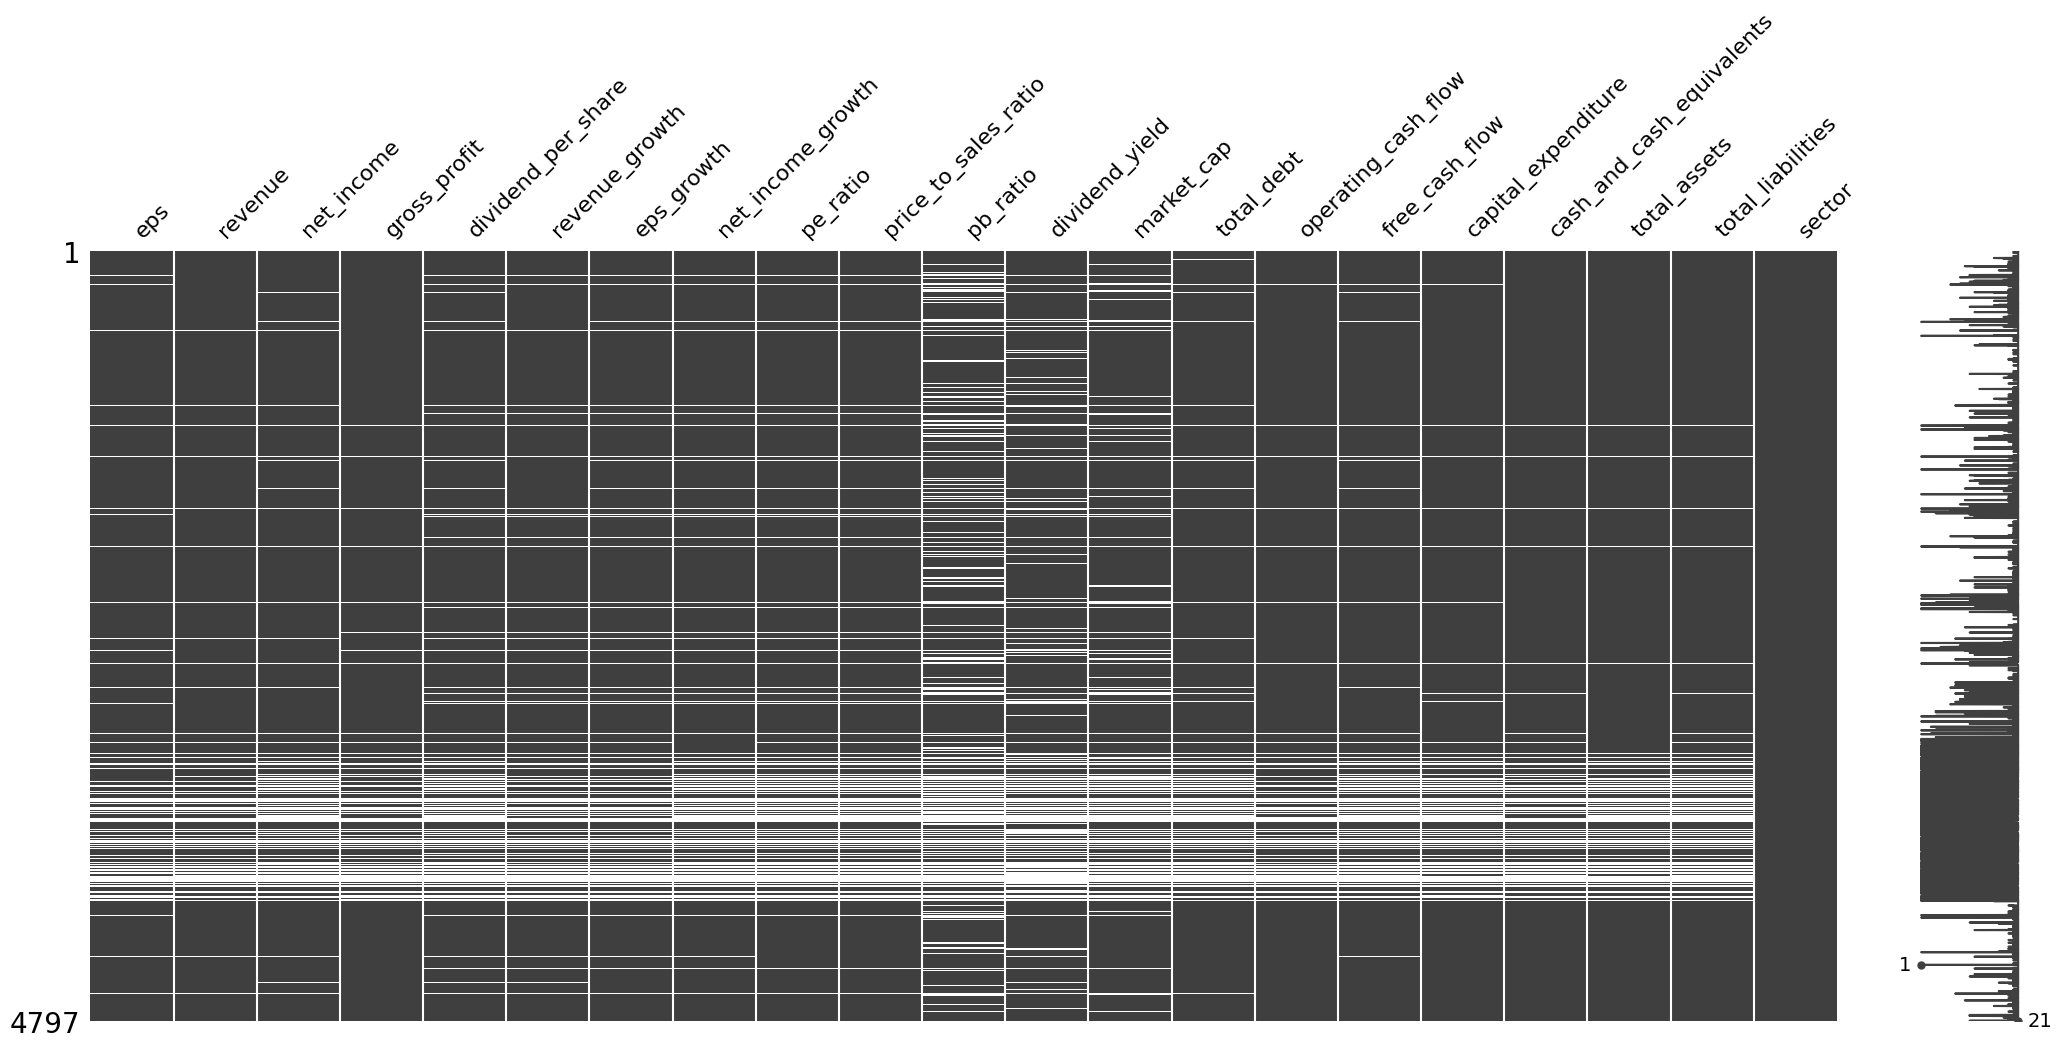

In [110]:
msno.matrix(predictors2016_selected)

<Axes: >

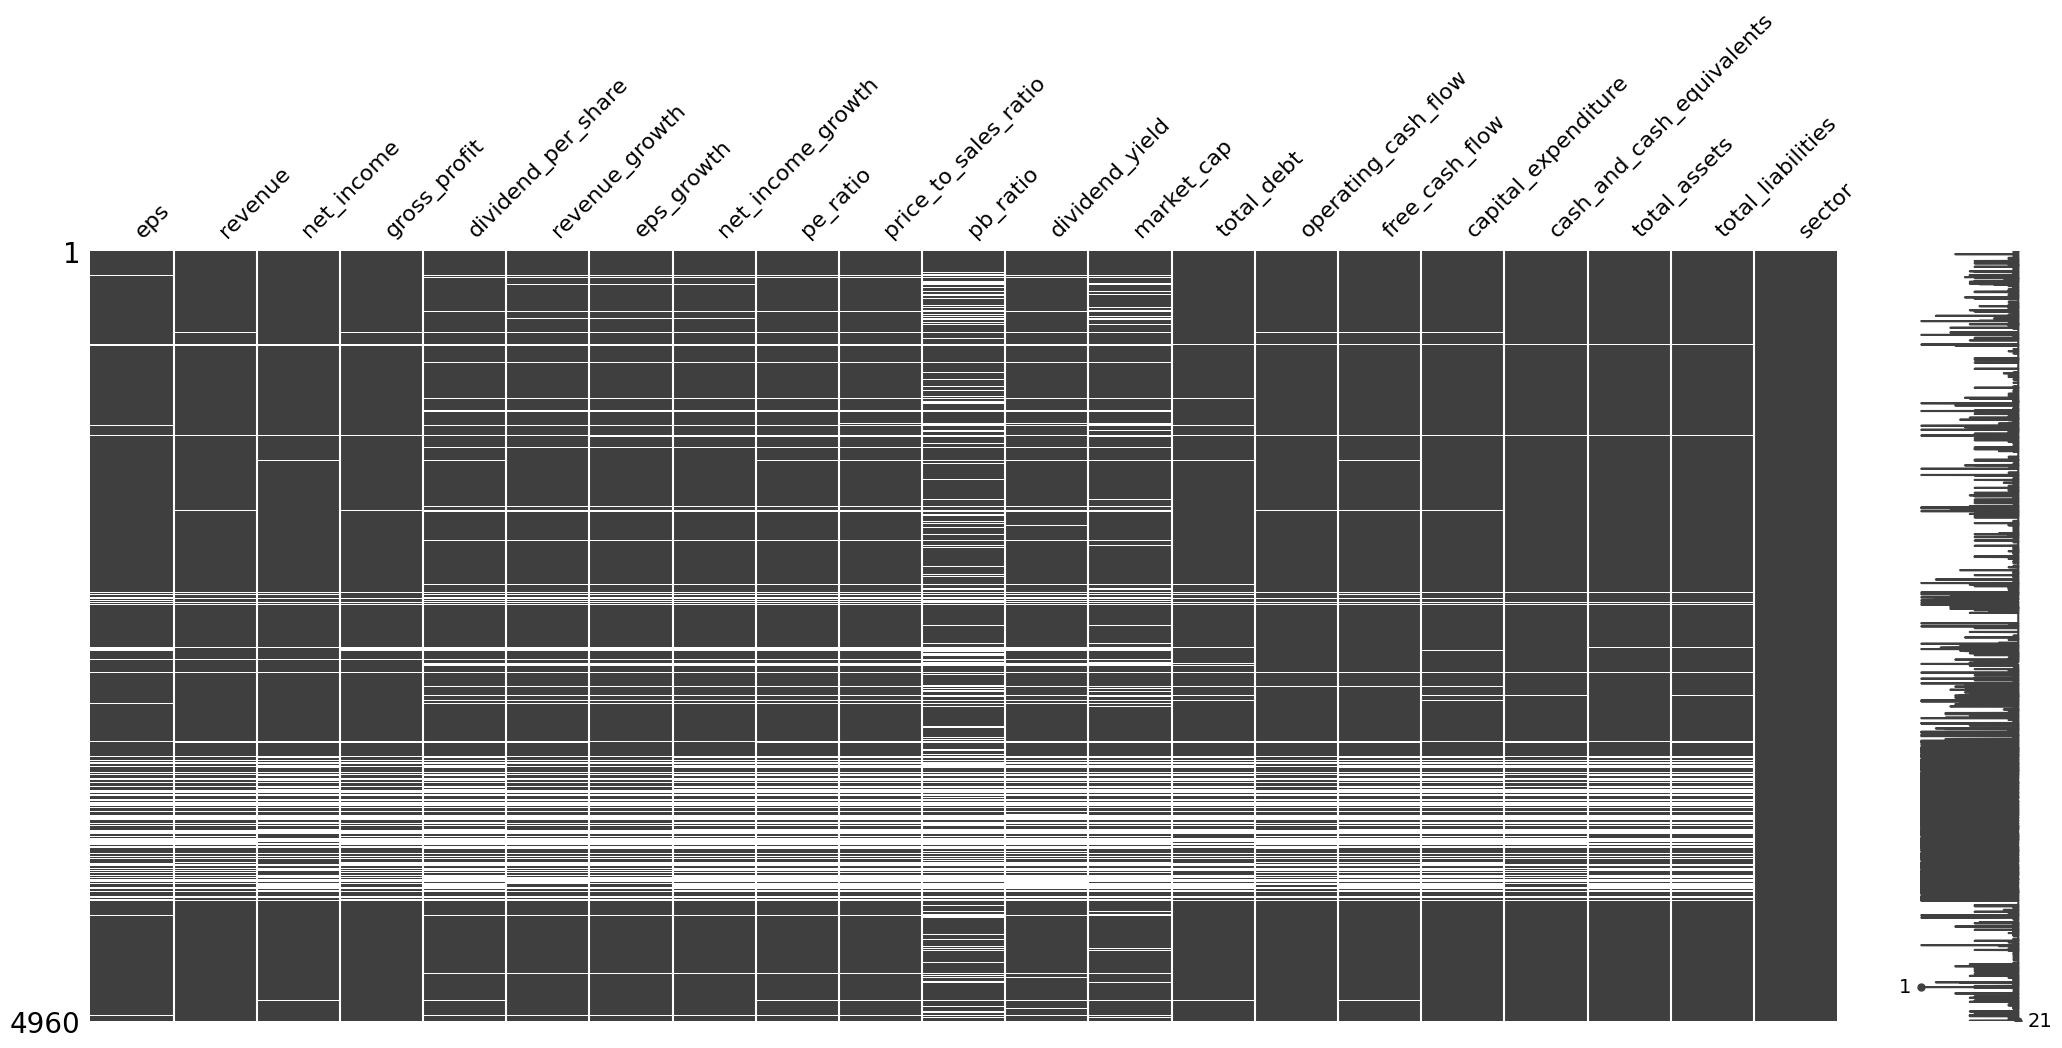

In [111]:
msno.matrix(predictors2017_selected)

<Axes: >

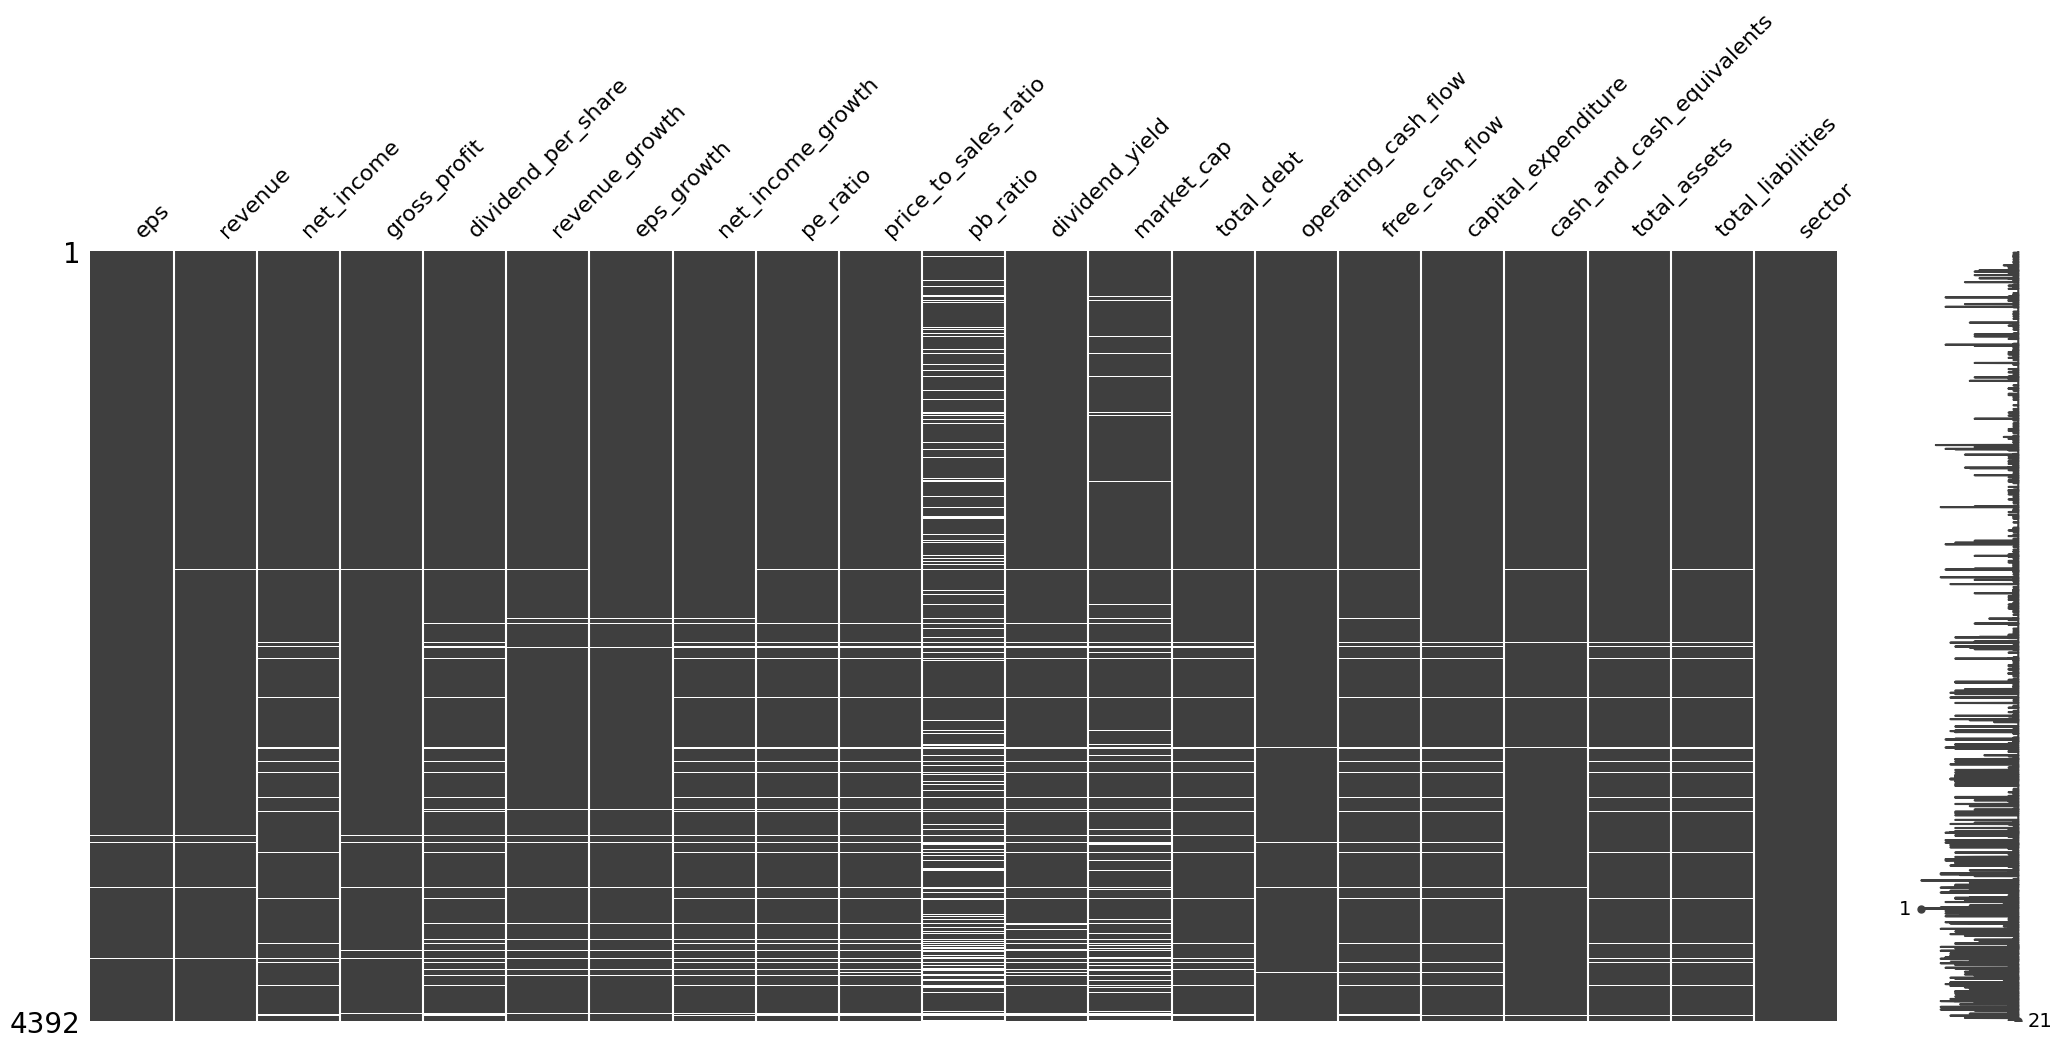

In [112]:
msno.matrix(predictors2018_selected)

<Axes: >

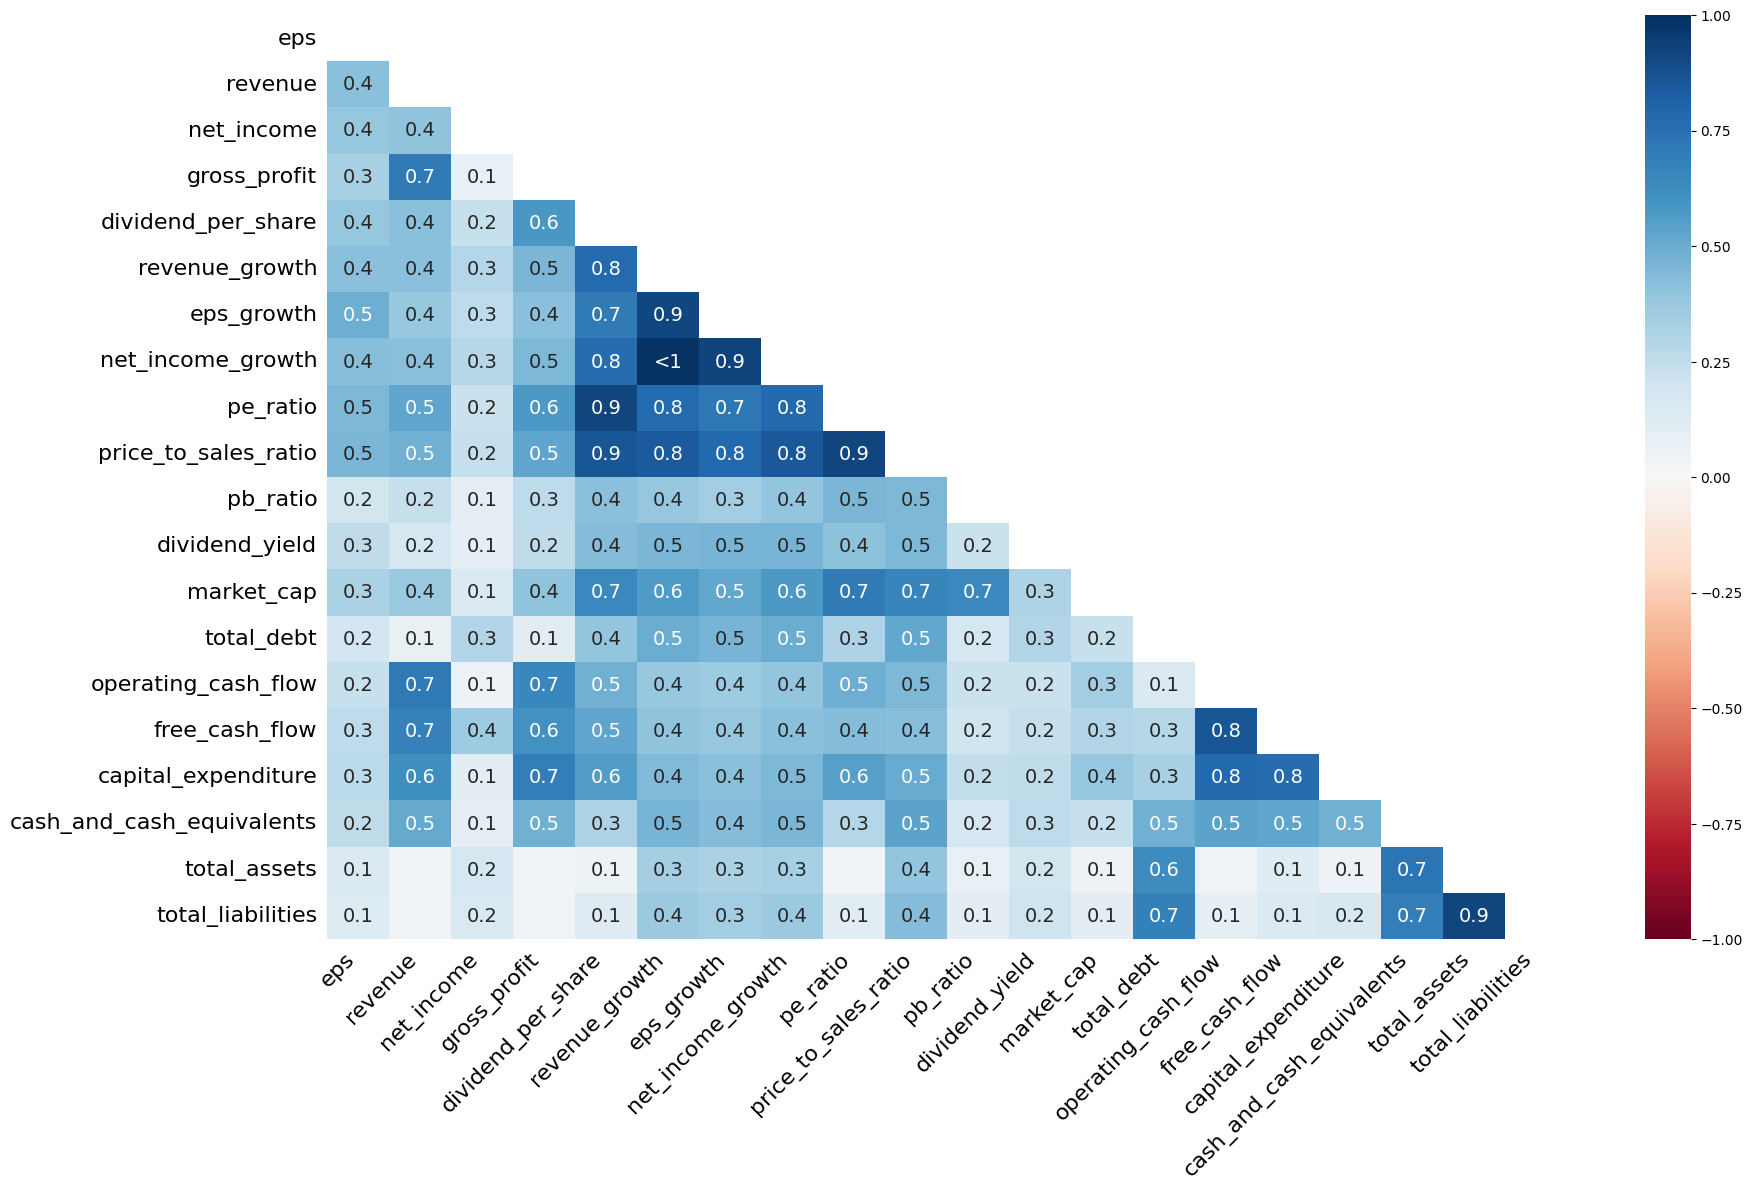

In [113]:
msno.heatmap(predictors2014_selected)

<Axes: >

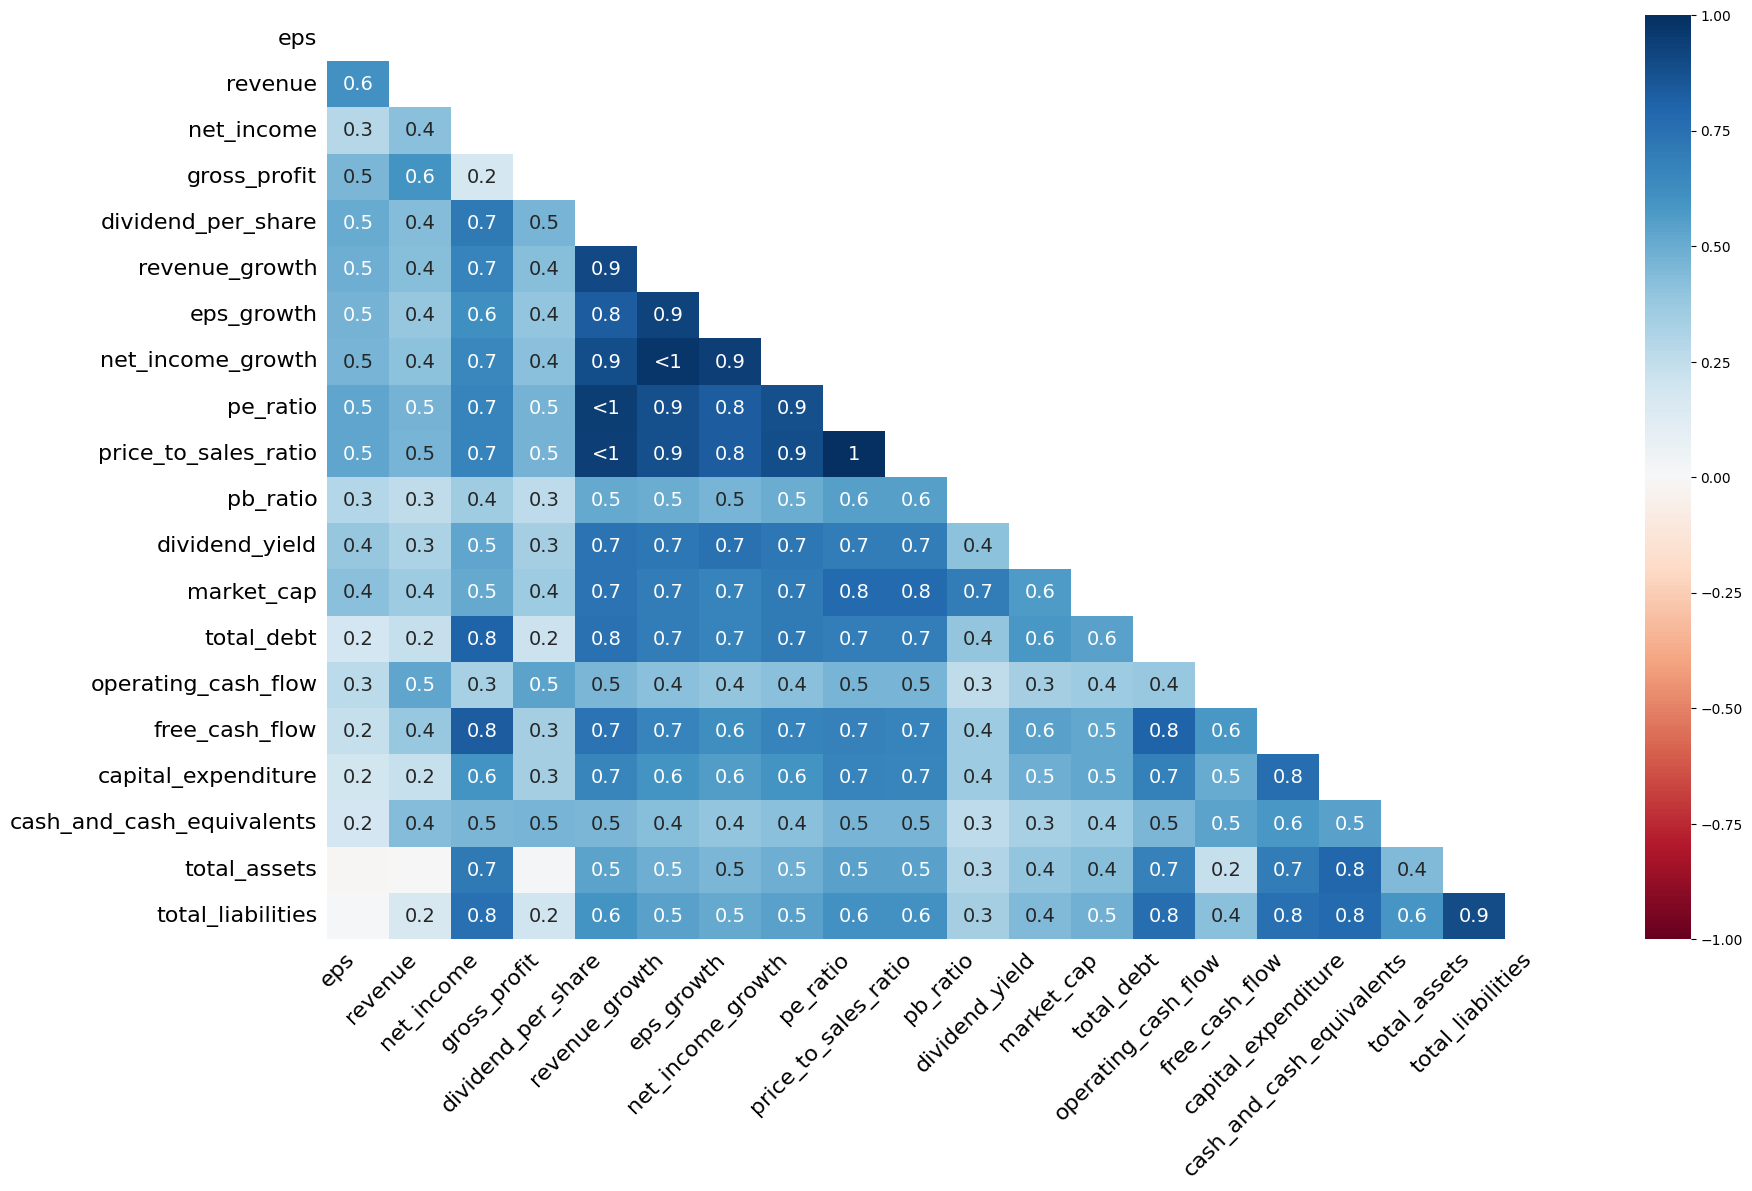

In [114]:
msno.heatmap(predictors2015_selected)

<Axes: >

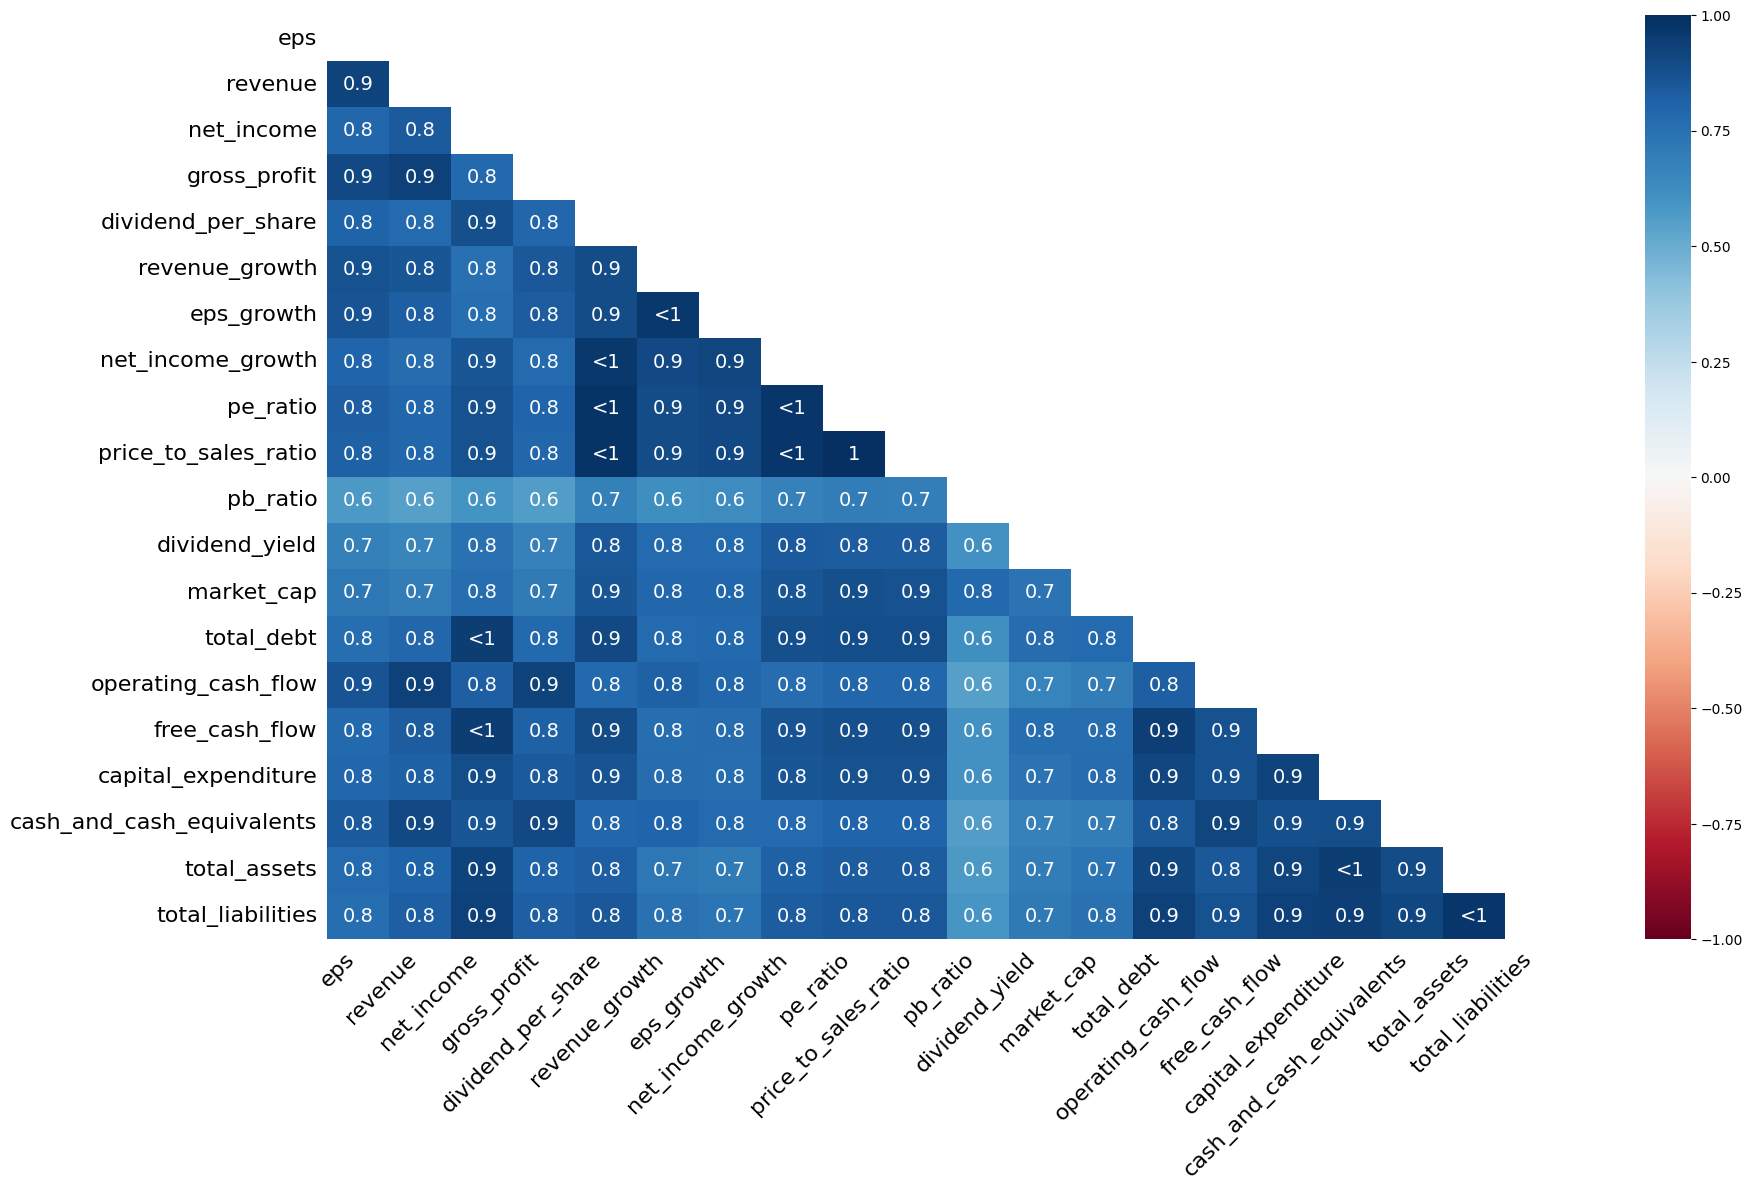

In [115]:
msno.heatmap(predictors2016_selected)

<Axes: >

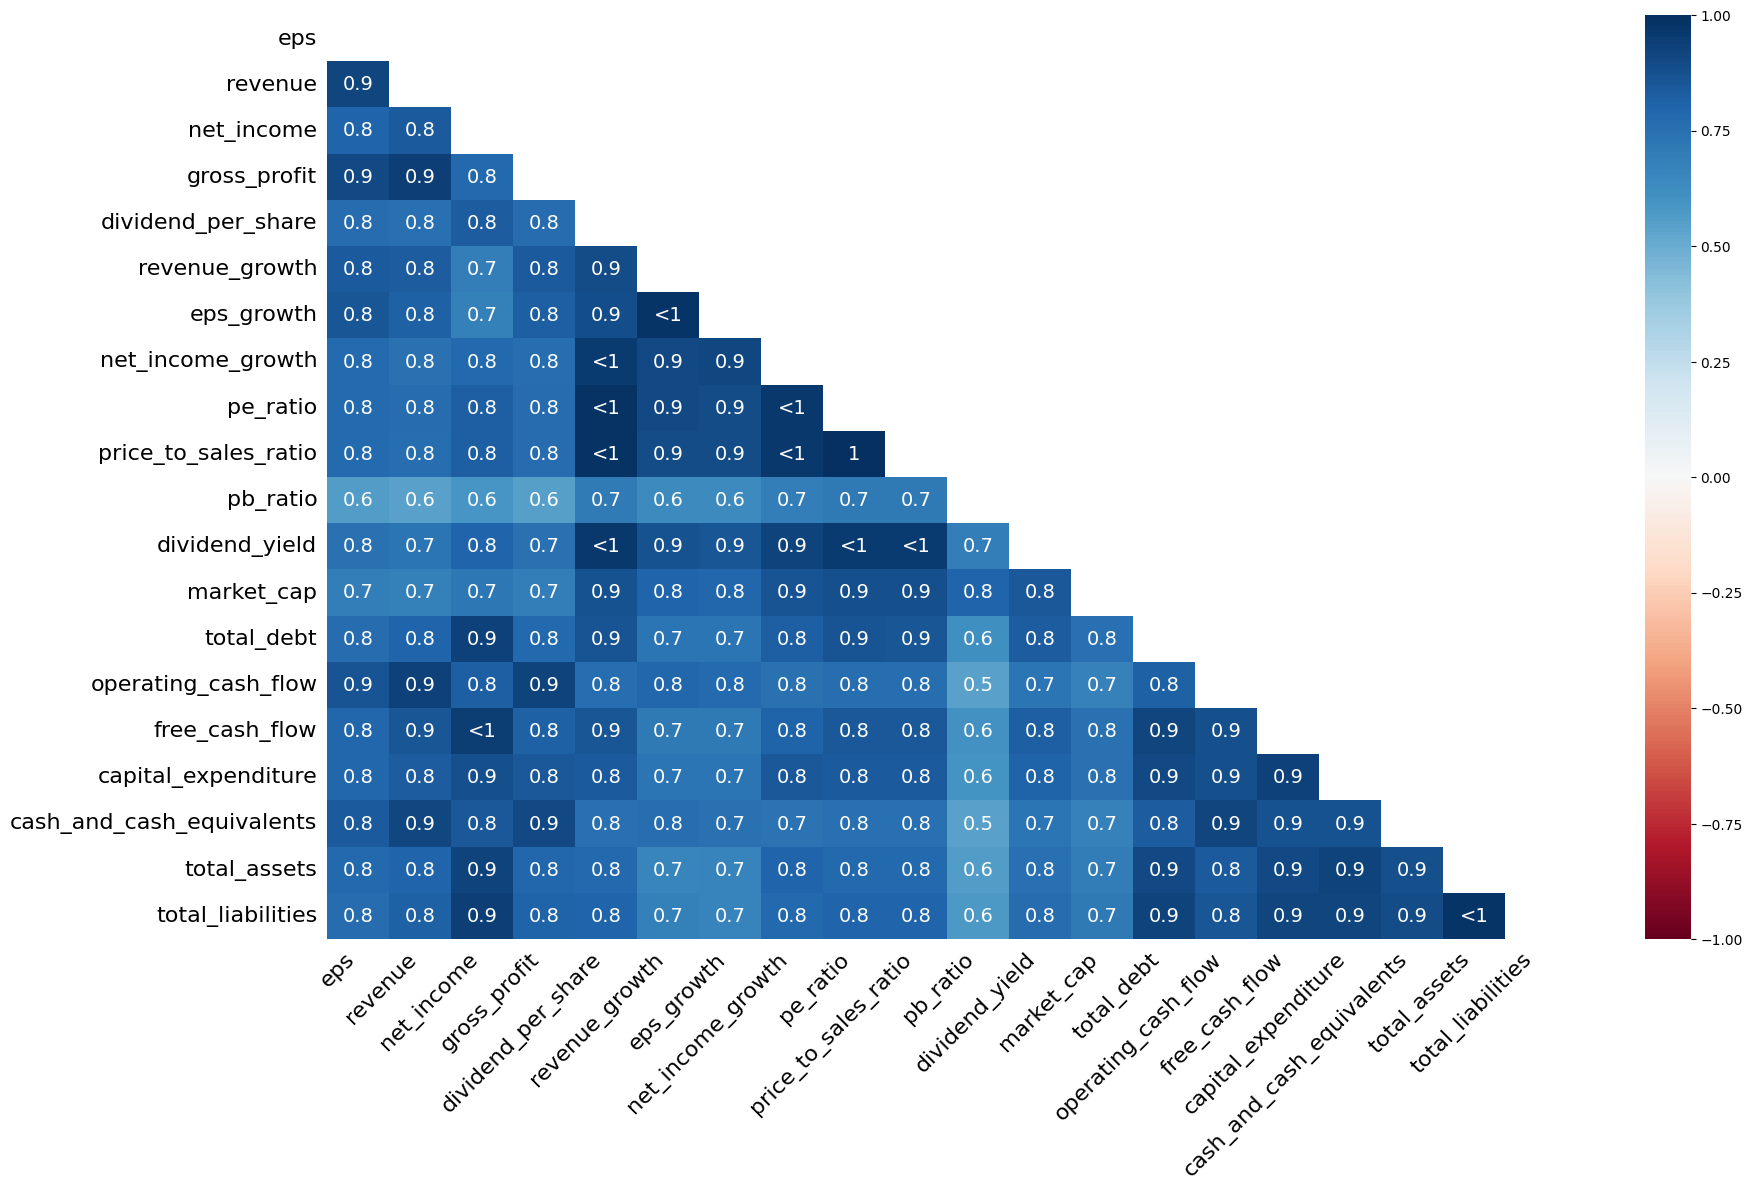

In [116]:
msno.heatmap(predictors2017_selected)

<Axes: >

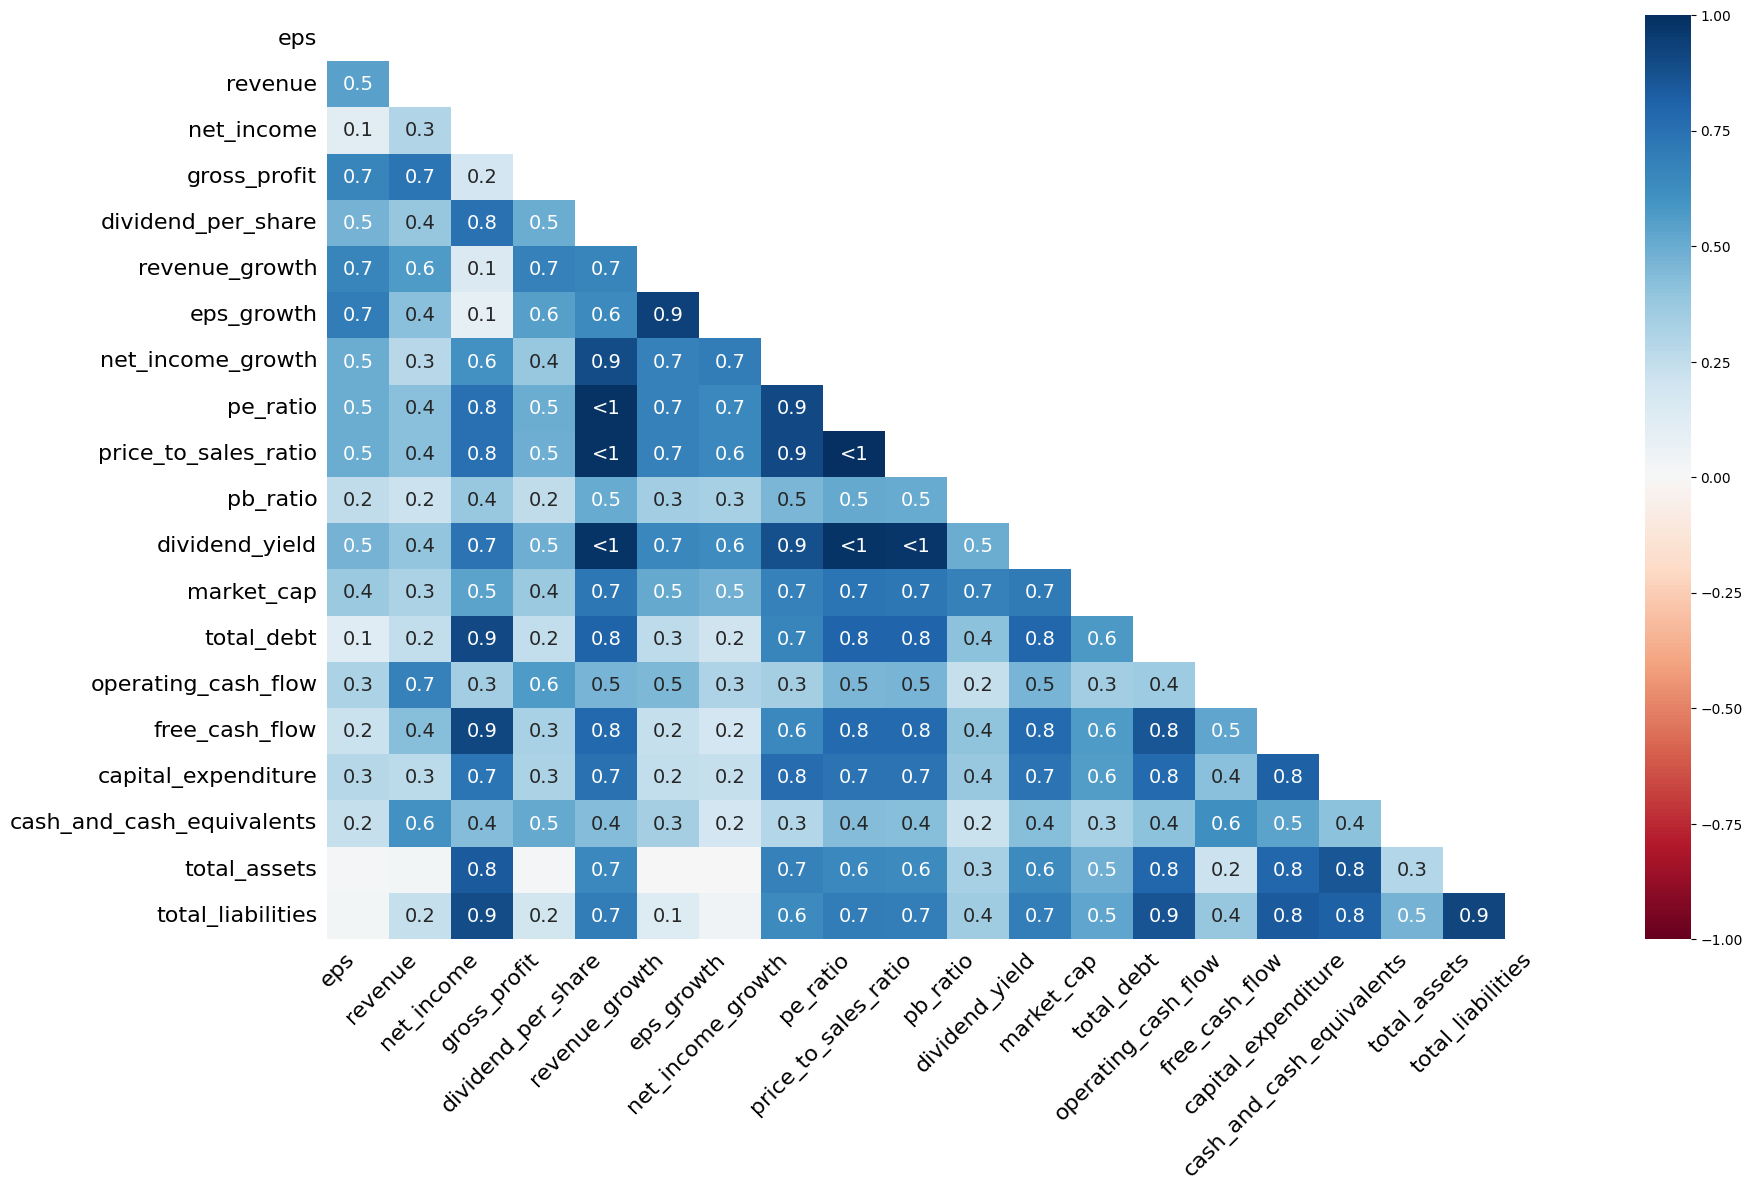

In [117]:
msno.heatmap(predictors2018_selected)

#### Dropping Predictors with $> 21\%$ Missingness

After dropping, we only have $20$ predictors left.

In [118]:
predictor2014_dropped = predictors2014_selected.drop('pb_ratio', axis=1)
predictor2015_dropped = predictors2015_selected.drop('pb_ratio', axis=1)
predictor2016_dropped = predictors2016_selected.drop('pb_ratio', axis=1)
predictor2017_dropped = predictors2017_selected.drop('pb_ratio', axis=1)
predictor2018_dropped = predictors2018_selected.drop('pb_ratio', axis=1)

In [119]:
predictor2014_dropped.shape

(3808, 20)

### Train Test Set Split

We split the data into training and testing sets first to ensure that the model is evaluated on data it hasn't seen during training.

In [120]:
# Split the data into training and test sets
X_2014_train, X_2014_test, y_2014_train, y_2014_test = train_test_split(predictor2014_dropped, 
                                                                        price_var2014, 
                                                                        test_size=0.2, 
                                                                        random_state=42)

X_2015_train, X_2015_test, y_2015_train, y_2015_test = train_test_split(predictor2015_dropped, 
                                                                        price_var2015, 
                                                                        test_size=0.2, 
                                                                        random_state=42)

X_2016_train, X_2016_test, y_2016_train, y_2016_test = train_test_split(predictor2016_dropped, 
                                                                        price_var2016, 
                                                                        test_size=0.2, 
                                                                        random_state=42)

X_2017_train, X_2017_test, y_2017_train, y_2017_test = train_test_split(predictor2017_dropped, 
                                                                        price_var2017, 
                                                                        test_size=0.2, 
                                                                        random_state=42)

X_2018_train, X_2018_test, y_2018_train, y_2018_test = train_test_split(predictor2018_dropped, 
                                                                        price_var2018, 
                                                                        test_size=0.2, 
                                                                        random_state=42)

### Data Scaling

We first scale the data (numerical predictors) as they are on very different scales. Since K-NN is a distance based algorith, scaling before imputing is better.

In [121]:
def scale_train_test(X_train, X_test):
    """
    Scales the numerical columns of training and test sets and combines them back 
    with the categorical data.

    Parameters:
    X_train (pd.DataFrame): The training set DataFrame.
    X_test (pd.DataFrame): The test set DataFrame.

    Returns:
    pd.DataFrame, pd.DataFrame: Scaled versions of X_train and X_test.
    """
    # Identify numerical columns
    numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

    # Separate numerical and categorical data
    X_train_numerical = X_train[numerical_cols]
    X_train_categorical = X_train.drop(columns=numerical_cols)
    X_test_numerical = X_test[numerical_cols]
    X_test_categorical = X_test.drop(columns=numerical_cols)

    # Fit the scaler using only the training data
    scaler = StandardScaler().fit(X_train_numerical)

    # Apply the scaler to the numerical data
    X_train_numerical_scaled = scaler.transform(X_train_numerical)
    X_test_numerical_scaled = scaler.transform(X_test_numerical)

    # Convert the scaled arrays back to pandas DataFrame
    X_train_numerical_scaled_df = pd.DataFrame(X_train_numerical_scaled, columns=numerical_cols, index=X_train.index)
    X_test_numerical_scaled_df = pd.DataFrame(X_test_numerical_scaled, columns=numerical_cols, index=X_test.index)

    # Combine the scaled numerical data with the original categorical data
    X_train_scaled = pd.concat([X_train_numerical_scaled_df, X_train_categorical], axis=1)
    X_test_scaled = pd.concat([X_test_numerical_scaled_df, X_test_categorical], axis=1)

    return X_train_scaled, X_test_scaled, scaler


In [122]:
# Scale the train and test sets
X_2014_train_scaled, X_2014_test_scaled, X_2014_scaler = scale_train_test(X_2014_train, X_2014_test)
X_2015_train_scaled, X_2015_test_scaled, X_2015_scaler = scale_train_test(X_2015_train, X_2015_test)
X_2016_train_scaled, X_2016_test_scaled, X_2016_scaler = scale_train_test(X_2016_train, X_2016_test)
X_2017_train_scaled, X_2017_test_scaled, X_2017_scaler = scale_train_test(X_2017_train, X_2017_test)
X_2018_train_scaled, X_2018_test_scaled, X_2018_scaler = scale_train_test(X_2018_train, X_2018_test)

In [123]:
X_2014_train_scaled.describe()

,eps,revenue,net_income,gross_profit,dividend_per_share,revenue_growth,eps_growth,net_income_growth,pe_ratio,price_to_sales_ratio,dividend_yield,market_cap,total_debt,operating_cash_flow,free_cash_flow,capital_expenditure,cash_and_cash_equivalents,total_assets,total_liabilities
count,2995.0000,3012.0000,3031.0000,3006.0000,2927.0000,2856.0000,2827.0000,2851.0000,2919.0000,2896.0000,2499.0000,2801.0000,2982.0000,3013.0000,3012.0000,3004.0000,2999.0000,3018.0000,3012.0000
mean,-0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000
std,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002
min,-54.5226,-0.1602,-1.8268,-0.2698,-0.1822,-0.0224,-16.2228,-34.7416,-0.1756,-0.0691,-0.0336,-0.2675,-0.1550,-0.9345,-4.4473,-38.5489,-0.1053,-0.0678,-0.0696
25%,0.0174,-0.1444,-0.1086,-0.1798,-0.1822,-0.0201,-0.0941,0.0050,-0.1756,-0.0679,-0.0336,-0.2608,-0.0691,-0.0716,-0.1417,0.0983,-0.1042,-0.0673,-0.0617
50%,0.0174,-0.1359,-0.1036,-0.1675,-0.1822,-0.0201,-0.0200,0.0192,-0.0890,-0.0663,-0.0334,-0.2367,-0.0673,-0.0690,-0.1359,0.1296,-0.1007,-0.0652,-0.0603
75%,0.0174,-0.0922,-0.0769,-0.1133,-0.0088,-0.0199,0.0616,0.0316,-0.0324,-0.0630,-0.0304,-0.1357,-0.0542,-0.0554,-0.1029,0.1335,-0.0871,-0.0554,-0.0532
max,4.3155,42.0775,48.0086,36.3980,40.9322,53.3947,16.5265,14.9141,29.5342,38.3082,46.4895,20.4865,50.6786,51.0843,25.2985,0.2641,34.3888,52.1176,52.1711


In [124]:
# Scale the responses
y_2014_train_scaled, y_2014_test_scaled, y_2014_scaler = scale_train_test(y_2014_train, y_2014_test)
y_2015_train_scaled, y_2015_test_scaled, y_2015_scaler = scale_train_test(y_2015_train, y_2015_test)
y_2016_train_scaled, y_2016_test_scaled, y_2016_scaler = scale_train_test(y_2016_train, y_2016_test)
y_2017_train_scaled, y_2017_test_scaled, y_2017_scaler = scale_train_test(y_2017_train, y_2017_test)
y_2018_train_scaled, y_2018_test_scaled, y_2018_scaler = scale_train_test(y_2018_train, y_2018_test)

### K-NN Imputation

From the previous examination we found that the only categorical predictor `sector` doesn't have missing values. Hence, for imputation, we only have to focus on imputating the numerical predictors.

In [125]:
def separate_and_impute(X_train, X_test, n_neighbors=1):
    """
    Separates the numerical and categorical columns, applies KNN imputation to the 
    numerical columns, and then combines them back with the categorical data.

    Parameters:
    X_train (pd.DataFrame): The training set DataFrame.
    X_test (pd.DataFrame): The test set DataFrame.
    n_neighbors (int): The number of neighbors to use for KNN imputation.
                       The default is 1 to impute with uncertainty.

    Returns:
    pd.DataFrame, pd.DataFrame: Imputed versions of X_train and X_test.
    """
    # Identify numerical columns
    numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

    # Separate numerical and categorical data
    X_train_num = X_train[numerical_cols]
    X_train_cat = X_train.drop(columns=numerical_cols)
    X_test_num = X_test[numerical_cols]
    X_test_cat = X_test.drop(columns=numerical_cols)

    # Initialize and fit the KNN imputer
    knn_imputer = KNNImputer(n_neighbors=n_neighbors)
    X_train_num_imputed = knn_imputer.fit_transform(X_train_num)
    X_test_num_imputed = knn_imputer.transform(X_test_num)

    # Convert the imputed arrays back to pandas DataFrames
    X_train_num_imputed_df = pd.DataFrame(X_train_num_imputed, columns=X_train_num.columns)
    X_test_num_imputed_df = pd.DataFrame(X_test_num_imputed, columns=X_test_num.columns)

    # Combine the imputed numerical data with the original categorical data
    X_train_imputed = pd.concat([X_train_num_imputed_df, X_train_cat.reset_index(drop=True)], axis=1)
    X_test_imputed = pd.concat([X_test_num_imputed_df, X_test_cat.reset_index(drop=True)], axis=1)

    return X_train_imputed, X_test_imputed

In [126]:
X_2014_train_scaled_imp, X_2014_test_scaled_imp = separate_and_impute(X_2014_train_scaled, X_2014_test_scaled)
X_2015_train_scaled_imp, X_2015_test_scaled_imp = separate_and_impute(X_2015_train_scaled, X_2015_test_scaled)
X_2016_train_scaled_imp, X_2016_test_scaled_imp = separate_and_impute(X_2016_train_scaled, X_2016_test_scaled)
X_2017_train_scaled_imp, X_2017_test_scaled_imp = separate_and_impute(X_2017_train_scaled, X_2017_test_scaled)
X_2018_train_scaled_imp, X_2018_test_scaled_imp = separate_and_impute(X_2018_train_scaled, X_2018_test_scaled)

In [127]:
X_2014_train_scaled_imp.isnull().sum()

eps                          0
revenue                      0
net_income                   0
gross_profit                 0
dividend_per_share           0
revenue_growth               0
eps_growth                   0
net_income_growth            0
pe_ratio                     0
price_to_sales_ratio         0
dividend_yield               0
market_cap                   0
total_debt                   0
operating_cash_flow          0
free_cash_flow               0
capital_expenditure          0
cash_and_cash_equivalents    0
total_assets                 0
total_liabilities            0
sector                       0
dtype: int64

In [128]:
X_2014_test_scaled_imp.isnull().sum()

eps                          0
revenue                      0
net_income                   0
gross_profit                 0
dividend_per_share           0
revenue_growth               0
eps_growth                   0
net_income_growth            0
pe_ratio                     0
price_to_sales_ratio         0
dividend_yield               0
market_cap                   0
total_debt                   0
operating_cash_flow          0
free_cash_flow               0
capital_expenditure          0
cash_and_cash_equivalents    0
total_assets                 0
total_liabilities            0
sector                       0
dtype: int64

In [129]:
X_2015_train_scaled_imp.isnull().sum()

eps                          0
revenue                      0
net_income                   0
gross_profit                 0
dividend_per_share           0
revenue_growth               0
eps_growth                   0
net_income_growth            0
pe_ratio                     0
price_to_sales_ratio         0
dividend_yield               0
market_cap                   0
total_debt                   0
operating_cash_flow          0
free_cash_flow               0
capital_expenditure          0
cash_and_cash_equivalents    0
total_assets                 0
total_liabilities            0
sector                       0
dtype: int64

In [130]:
X_2015_test_scaled_imp.isnull().sum()

eps                          0
revenue                      0
net_income                   0
gross_profit                 0
dividend_per_share           0
revenue_growth               0
eps_growth                   0
net_income_growth            0
pe_ratio                     0
price_to_sales_ratio         0
dividend_yield               0
market_cap                   0
total_debt                   0
operating_cash_flow          0
free_cash_flow               0
capital_expenditure          0
cash_and_cash_equivalents    0
total_assets                 0
total_liabilities            0
sector                       0
dtype: int64

In [131]:
X_2016_train_scaled_imp.isnull().sum()

eps                          0
revenue                      0
net_income                   0
gross_profit                 0
dividend_per_share           0
revenue_growth               0
eps_growth                   0
net_income_growth            0
pe_ratio                     0
price_to_sales_ratio         0
dividend_yield               0
market_cap                   0
total_debt                   0
operating_cash_flow          0
free_cash_flow               0
capital_expenditure          0
cash_and_cash_equivalents    0
total_assets                 0
total_liabilities            0
sector                       0
dtype: int64

In [132]:
X_2016_test_scaled_imp.isnull().sum()

eps                          0
revenue                      0
net_income                   0
gross_profit                 0
dividend_per_share           0
revenue_growth               0
eps_growth                   0
net_income_growth            0
pe_ratio                     0
price_to_sales_ratio         0
dividend_yield               0
market_cap                   0
total_debt                   0
operating_cash_flow          0
free_cash_flow               0
capital_expenditure          0
cash_and_cash_equivalents    0
total_assets                 0
total_liabilities            0
sector                       0
dtype: int64

In [133]:
X_2017_train_scaled_imp.isnull().sum()

eps                          0
revenue                      0
net_income                   0
gross_profit                 0
dividend_per_share           0
revenue_growth               0
eps_growth                   0
net_income_growth            0
pe_ratio                     0
price_to_sales_ratio         0
dividend_yield               0
market_cap                   0
total_debt                   0
operating_cash_flow          0
free_cash_flow               0
capital_expenditure          0
cash_and_cash_equivalents    0
total_assets                 0
total_liabilities            0
sector                       0
dtype: int64

In [134]:
X_2017_test_scaled_imp.isnull().sum()

eps                          0
revenue                      0
net_income                   0
gross_profit                 0
dividend_per_share           0
revenue_growth               0
eps_growth                   0
net_income_growth            0
pe_ratio                     0
price_to_sales_ratio         0
dividend_yield               0
market_cap                   0
total_debt                   0
operating_cash_flow          0
free_cash_flow               0
capital_expenditure          0
cash_and_cash_equivalents    0
total_assets                 0
total_liabilities            0
sector                       0
dtype: int64

In [135]:
X_2018_train_scaled_imp.isnull().sum()

eps                          0
revenue                      0
net_income                   0
gross_profit                 0
dividend_per_share           0
revenue_growth               0
eps_growth                   0
net_income_growth            0
pe_ratio                     0
price_to_sales_ratio         0
dividend_yield               0
market_cap                   0
total_debt                   0
operating_cash_flow          0
free_cash_flow               0
capital_expenditure          0
cash_and_cash_equivalents    0
total_assets                 0
total_liabilities            0
sector                       0
dtype: int64

In [136]:
X_2018_test_scaled_imp.isnull().sum()

eps                          0
revenue                      0
net_income                   0
gross_profit                 0
dividend_per_share           0
revenue_growth               0
eps_growth                   0
net_income_growth            0
pe_ratio                     0
price_to_sales_ratio         0
dividend_yield               0
market_cap                   0
total_debt                   0
operating_cash_flow          0
free_cash_flow               0
capital_expenditure          0
cash_and_cash_equivalents    0
total_assets                 0
total_liabilities            0
sector                       0
dtype: int64

### One-Hot Encoding

The only categorical predictor in our dataset is `sector`. We use one-hot encoding to handle it before we can do PCA.

In [137]:
X_2014_train_final = pd.get_dummies(X_2014_train_scaled_imp, columns=['sector'])
X_2014_test_final = pd.get_dummies(X_2014_test_scaled_imp, columns=['sector'])

X_2015_train_final = pd.get_dummies(X_2015_train_scaled_imp, columns=['sector'])
X_2015_test_final = pd.get_dummies(X_2015_test_scaled_imp, columns=['sector'])

X_2016_train_final = pd.get_dummies(X_2016_train_scaled_imp, columns=['sector'])
X_2016_test_final = pd.get_dummies(X_2016_test_scaled_imp, columns=['sector'])

X_2017_train_final = pd.get_dummies(X_2017_train_scaled_imp, columns=['sector'])
X_2017_test_final = pd.get_dummies(X_2017_test_scaled_imp, columns=['sector'])

X_2018_train_final = pd.get_dummies(X_2018_train_scaled_imp, columns=['sector'])
X_2018_test_final = pd.get_dummies(X_2018_test_scaled_imp, columns=['sector'])

### Principle Component Analysis (PCA)

In [ ]:
variance_threshold = 0.90
n_to_plot = 45

In [ ]:
def opt_pca_components(X_train, n_to_plot, variance_threshold):
    """
    Fits PCA to the training data, plots the cumulative explained variance ratio, 
    and determines the optimal number of components based on the variance threshold.

    Parameters:
    X_train: Training data.
    n_to_plot: Number of principal components to consider in the plot.
    variance_threshold: Cumulative variance threshold to determine the optimal number of components.

    Returns:
    n_components: Optimal number of principal components based on the variance threshold.
    """

    # Fit PCA on the training data
    pca = PCA().fit(X_train)

    # Plot the cumulative explained variance ratio
    plt.plot(range(1, n_to_plot + 1), np.cumsum(pca.explained_variance_ratio_[:n_to_plot]), 'o:')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title(f'Principal Components Analysis')

    # Determine the optimal number of components
    n_components = np.where(np.cumsum(pca.explained_variance_ratio_) >= variance_threshold)[0][0] + 1

    # Print and return the optimal number of components
    print(f"Best number of components: {n_components}")
    return n_components


In [ ]:
n_comp_2014 = opt_pca_components(X_2014_train_final, n_to_plot, variance_threshold)

In [ ]:
n_comp_2015 = opt_pca_components(X_2015_train_final, n_to_plot, variance_threshold)

In [ ]:
n_comp_2016 = opt_pca_components(X_2016_train_final, n_to_plot, variance_threshold)

In [ ]:
n_comp_2017 = opt_pca_components(X_2017_train_final, n_to_plot, variance_threshold)

In [ ]:
n_comp_2018 = opt_pca_components(X_2018_train_final, n_to_plot, variance_threshold)

The largest best number of components is $24$ (both $2017$ and $2018$), so we will proceed with $24$ principle components.

In [ ]:
best_n = 24
column_names = [f'pc_{i+1}' for i in range(best_n)]

In [ ]:
pca2014 = PCA(n_components=best_n)
X_2014_train_pca = pca2014.fit_transform(X_2014_train_final)
X_2014_test_pca = pca2014.transform(X_2014_test_final)

# Convert to pandas DataFrame
X_2014_train_pca_df = pd.DataFrame(X_2014_train_pca, columns=column_names)
X_2014_test_pca_df = pd.DataFrame(X_2014_test_pca, columns=column_names)

In [ ]:
X_2014_train_pca_df.head()

In [ ]:
X_2014_test_pca_df.head()

In [ ]:
pca2015 = PCA(n_components=best_n)
X_2015_train_pca = pca2015.fit_transform(X_2015_train_final)
X_2015_test_pca = pca2015.transform(X_2015_test_final)

# Convert to pandas DataFrame
X_2015_train_pca_df = pd.DataFrame(X_2015_train_pca, columns=column_names)
X_2015_test_pca_df = pd.DataFrame(X_2015_test_pca, columns=column_names)

In [ ]:
X_2015_train_pca_df.head()

In [ ]:
X_2015_test_pca_df.head()

In [ ]:
pca2016 = PCA(n_components=best_n)
X_2016_train_pca = pca2016.fit_transform(X_2016_train_final)
X_2016_test_pca = pca2016.transform(X_2016_test_final)

# Convert to pandas DataFrame
X_2016_train_pca_df = pd.DataFrame(X_2016_train_pca, columns=column_names)
X_2016_test_pca_df = pd.DataFrame(X_2016_test_pca, columns=column_names)

In [ ]:
X_2016_train_pca_df.head()

In [ ]:
X_2016_test_pca_df.head()

In [ ]:
pca2017 = PCA(n_components=best_n)
X_2017_train_pca = pca2017.fit_transform(X_2017_train_final)
X_2017_test_pca = pca2017.transform(X_2017_test_final)

# Convert to pandas DataFrame
X_2017_train_pca_df = pd.DataFrame(X_2016_train_pca, columns=column_names)
X_2017_test_pca_df = pd.DataFrame(X_2016_test_pca, columns=column_names)

In [ ]:
X_2017_train_pca_df.head()

In [ ]:
X_2017_test_pca_df.head()

In [ ]:
pca2018 = PCA(n_components=best_n)
X_2018_train_pca = pca2018.fit_transform(X_2018_train_final)
X_2018_test_pca = pca2018.transform(X_2018_test_final)

# Convert to pandas DataFrame
X_2018_train_pca_df = pd.DataFrame(X_2018_train_pca, columns=column_names)
X_2018_test_pca_df = pd.DataFrame(X_2018_test_pca, columns=column_names)

In [ ]:
X_2018_train_pca_df.head()

In [ ]:
X_2018_test_pca_df.head()

<a id="project_organization"></a>

## Part 1: Stock Performance Prediction Model

[Return to contents](#contents)

### Cleaned Datasets Available

#### Predictors

**Scaled, imputed, not encoded**
* `X_2014_train_scaled_imp`
* `X_2014_test_scaled_imp`
* `X_2015_train_scaled_imp`
* `X_2015_test_scaled_imp`
* `X_2016_train_scaled_imp`
* `X_2016_test_scaled_imp`
* `X_2017_train_scaled_imp`
* `X_2017_test_scaled_imp`
* `X_2018_train_scaled_imp`
* `X_2018_test_scaled_imp`

**Scaled, imputed, encoded**
* `X_2014_train_final`
* `X_2014_test_final`
* `X_2015_train_final`
* `X_2015_test_final`
* `X_2016_train_final`
* `X_2016_test_final`
* `X_2017_train_final`
* `X_2017_test_final`
* `X_2018_train_final`
* `X_2018_test_final`

**Principle components**
* `X_2014_train_pca_df`
* `X_2014_test_pca_df`
* `X_2015_train_pca_df`
* `X_2015_test_pca_df`
* `X_2016_train_pca_df`
* `X_2016_test_pca_df`
* `X_2017_train_pca_df`
* `X_2017_test_pca_df`
* `X_2018_train_pca_df`
* `X_2018_test_pca_df`

#### Targets
We will only use `price_var20xx` since we are focusing on regression problems.
* `class2014`
* `price_var2014`
* `class2015`
* `price_var2015`
* `class2016`
* `price_var2016`
* `class2017`
* `price_var2017`
* `class2018`
* `price_var2018`

### Baseline Model Candidates

#### Mean/Median Prediction Model

#### Multiple Linear Regression

### More Complex Model Candidates

#### Ridge Regression

#### Lasso Regression

#### Elastic Net Regression

#### Random Forest Regressors

#### Gradient Boosting

### Evaluation

<a id="project_organization"></a>

## Part 2: Network Analysis of Stock Market Interdependencies

[Return to contents](#contents)